# Insurance Claims- Fraud Detection
## Problem Statement: Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 


Note: Use the link below to reach to your dataset. 

## Importing Libraries

In [1]:
# To Read and Process Data
import pandas as pd
import numpy as np


# For data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Getting over warning messages
import warnings
warnings.filterwarnings('ignore')

# For Encoding Categorical Data
from sklearn.preprocessing import LabelEncoder

# for scaling
from sklearn.preprocessing import StandardScaler

# To display all columns
pd.pandas.set_option('display.max_columns',None)

In [2]:
# For handling outliers
# importing required libraries
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore

In [3]:
# For machine learning and finding 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [4]:
df = pd.read_csv('Automobile_insurance_fraud.csv')

## Data Analysis

In [5]:
# getting to know size of data set, to know overall records, and columns
print(f'Number of rows and columns in given Data Frame is {df.shape}')

Number of rows and columns in given Data Frame is (1000, 40)


In [6]:
df.shape

(1000, 40)

In [7]:
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip insured_sex insured_education_level insured_occupation  \
0       466132        MALE                      MD       craft-repair   
1       468176        MALE                      MD  machine-op-inspct   
2       430632      FEMALE                     PhD              sales   
3       608117      FEMALE                     PhD       armed-forces   
4       610706        MALE               Associate              sales   

  insured_hobbies insured_relationship  capital-gains  capital-loss  \
0        sleeping              husband          53300             0   
1         reading       other-relative              0             0   
2     board-games            own-child          35100             0   
3     board-games            unmarried          48900        -62400   
4     board-games            unmarried          66000        -46000   

  incident_date             incident_type   collision_type incident_severity  \
0    25-01-2015  Single Vehicle Collision   Side Collision      Major Damage   
1    21-01-2015             Vehicle Theft                ?      Minor Damage   
2    22-02-2015   Multi-vehicle Collision   Rear Collision      Minor Damage   
3    10-01-2015  Single Vehicle Collision  Front Collision      Major Damage   
4    17-02-2015             Vehicle Theft                ?      Minor Damage   

  authorities_contacted incident_state incident_city  incident_location  \
0                Police             SC      Columbus     9935 4th Drive   
1                Police             VA     Riverwood       6608 MLK Hwy   
2                Police             NY      Columbus  7121 Francis Lane   
3                Police             OH     Arlington   6956 Maple Drive   
4                  None             NY     Arlington       3041 3rd Ave   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1               ?   
2                         7                            3              NO   
3                         5                            1               ?   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                       ?                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             6

In [8]:
df.tail()

months_as_customer  age  policy_number policy_bind_date policy_state  \
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip insured_sex insured_education_level insured_occupation  \
995       431289      FEMALE                 Masters       craft-repair   
996       608177      FEMALE                     PhD     prof-specialty   
997       442797      FEMALE                 Masters       armed-forces   
998       441714        MALE               Associate  handlers-cleaners   
999       612260      FEMALE               Associate              sales   

    insured_hobbies insured_relationship  capital-gains  capital-loss  \
995       paintball            unmarried              0             0   
996        sleeping                 wife          70900             0   
997  bungie-jumping       other-relative          35100             0   
998    base-jumping                 wife              0             0   
999        kayaking              husband              0             0   

    incident_date             incident_type   collision_type  \
995    22-02-2015  Single Vehicle Collision  Front Collision   
996    24-01-2015  Single Vehicle Collision   Rear Collision   
997    23-01-2015   Multi-vehicle Collision   Side Collision   
998    26-02-2015  Single Vehicle Collision   Rear Collision   
999    26-02-2015                Parked Car                ?   

    incident_severity authorities_contacted incident_state incident_city  \
995      Minor Damage                  Fire             NC    Northbrook   
996      Major Damage                  Fire             SC     Northbend   
997      Minor Damage                Police             NC     Arlington   
998      Major Damage                 Other             NY     Arlington   
999      Minor Damage                Police             WV      Columbus   

       incident_location  incident_hour_of_the_day  \
995   6045 Andromedia St                        20   
996     3092 Texas Drive                        23   
997          7629 5th St                         4   
998        6128 Elm Lane                         2   
999  1416 Cherokee Ridge                         6   

     number_of_vehicles_involved property_damage  bodily_injuries  witnesses  \
995                            1             YES                0          1   
996                            1             YES                2          3   
997                            3               ?                2          3   
998                            1               ?                0          1   
999                            1               ?                0          3   

    police_report_available  total_claim_amount  injury_claim  property_claim  \
995                       ?               87200         17440            8720   
996                       ?              108480         18080           18080   
997                     YES               67500          7500            7500   
998                     YES               46980          5220            5220   
999                       ?                5060           460             920   

     vehicle_claim   auto_make auto_model  auto_year fraud_r

In [9]:
df.sample()

months_as_customer  age  policy_number policy_bind_date policy_state  \
90                 127   29         686816       07-12-1999           OH   

   policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
90    250/500               2000                1326.44         5000000   

    insured_zip insured_sex insured_education_level insured_occupation  \
90       436973      FEMALE             High School              sales   

   insured_hobbies insured_relationship  capital-gains  capital-loss  \
90     board-games            own-child              0             0   

   incident_date            incident_type   collision_type incident_severity  \
90    24-02-2015  Multi-vehicle Collision  Front Collision        Total Loss   

   authorities_contacted incident_state incident_city incident_location  \
90                  Fire             SC     Arlington  8442 Britain Hwy   

    incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
90                        12                            2             YES   

    bodily_injuries  witnesses police_report_available  total_claim_amount  \
90                1          1                       ?               66950   

    injury_claim  property_claim  vehicle_claim auto_make auto_model  \
90         10300           10300          46350      Saab         93   

    auto_year fraud_reported  _c39  
90       1995              N   NaN

In [10]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

### Observation -
- There are total 1000 records with 40 columns in each entry.

### More About Data

In [11]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

### Five Number Summery for Continuous variable

In [12]:
df.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  _c39  
count     1000.000000    1000.000000  1000.000000   0.0  
mean      7399.570000   37928.950000  2005.103000   NaN  
std       4824.726179   18886.252893     6.015861   NaN  
min          0.000000      70.000000  1995.000000   NaN  
25%       4445.000000   30292.500000  2000.000000   NaN  
50%       6750.000000   42100.000000  2005.000000   NaN  
75%      10885.000000   50822.500000  2010.000000   NaN  
max      23670.000000   79560.000000  2015.000000   NaN

### Know about Categorical Variable

In [13]:
df.describe(include="O")

policy_bind_date policy_state policy_csl insured_sex  \
count              1000         1000       1000        1000   
unique              951            3          3           2   
top          01-01-2006           OH    250/500      FEMALE   
freq                  3          352        351         537   

       insured_education_level insured_occupation insured_hobbies  \
count                     1000               1000            1000   
unique                       7                 14              20   
top                         JD  machine-op-inspct         reading   
freq                       161                 93              64   

       insured_relationship incident_date            incident_type  \
count                  1000          1000                     1000   
unique                    6            60                        4   
top               own-child    02-02-2015  Multi-vehicle Collision   
freq                    183            28                      419   

        collision_type incident_severity authorities_contacted incident_state  \
count             1000              1000                  1000           1000   
unique               4                 4                     5              7   
top     Rear Collision      Minor Damage                Police             NY   
freq               292               354                   292            262   

       incident_city incident_location property_damage  \
count           1000              1000            1000   
unique             7              1000               3   
top      Springfield    9935 4th Drive               ?   
freq             157                 1             360   

       police_report_available auto_make auto_model fraud_reported  
count                     1000      1000       1000           1000  
unique                       3        14         39              2  
top                          ?      Saab        RAM              N  
freq                       343        80         43            753

### Observations - 
- Total unique count of policy_bind_date is 951 and incident_location is 1000, so dropping these columns

### Know About Missing Values

In [14]:
# Feature Wise missing Values
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [15]:
# All missing Values
print("There are total", df.isnull().sum().sum(), "missing values in dataset")

There are total 1000 missing values in dataset


In [16]:
df.drop('_c39', axis=1, inplace=True)

In [17]:
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip insured_sex insured_education_level insured_occupation  \
0       466132        MALE                      MD       craft-repair   
1       468176        MALE                      MD  machine-op-inspct   
2       430632      FEMALE                     PhD              sales   
3       608117      FEMALE                     PhD       armed-forces   
4       610706        MALE               Associate              sales   

  insured_hobbies insured_relationship  capital-gains  capital-loss  \
0        sleeping              husband          53300             0   
1         reading       other-relative              0             0   
2     board-games            own-child          35100             0   
3     board-games            unmarried          48900        -62400   
4     board-games            unmarried          66000        -46000   

  incident_date             incident_type   collision_type incident_severity  \
0    25-01-2015  Single Vehicle Collision   Side Collision      Major Damage   
1    21-01-2015             Vehicle Theft                ?      Minor Damage   
2    22-02-2015   Multi-vehicle Collision   Rear Collision      Minor Damage   
3    10-01-2015  Single Vehicle Collision  Front Collision      Major Damage   
4    17-02-2015             Vehicle Theft                ?      Minor Damage   

  authorities_contacted incident_state incident_city  incident_location  \
0                Police             SC      Columbus     9935 4th Drive   
1                Police             VA     Riverwood       6608 MLK Hwy   
2                Police             NY      Columbus  7121 Francis Lane   
3                Police             OH     Arlington   6956 Maple Drive   
4                  None             NY     Arlington       3041 3rd Ave   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1               ?   
2                         7                            3              NO   
3                         5                            1               ?   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                       ?                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             6

### Observation - 
- Dropping _C39 columns

### Seperating Data as categorical and Numerical Data

In [18]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == "O"]
numerical_features = [feature for feature in df.columns if df[feature].dtype != "O"]

In [19]:
categorical_features

['policy_bind_date',
 'policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'fraud_reported']

In [20]:
numerical_features

['months_as_customer',
 'age',
 'policy_number',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_zip',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_year']

In [21]:
print(f'Total Categorical Features are {len(categorical_features)}')
print(f'Total Numerical Features are {len(numerical_features)}')

Total Categorical Features are 21
Total Numerical Features are 18


## Plotting to understand Data Distribution¶

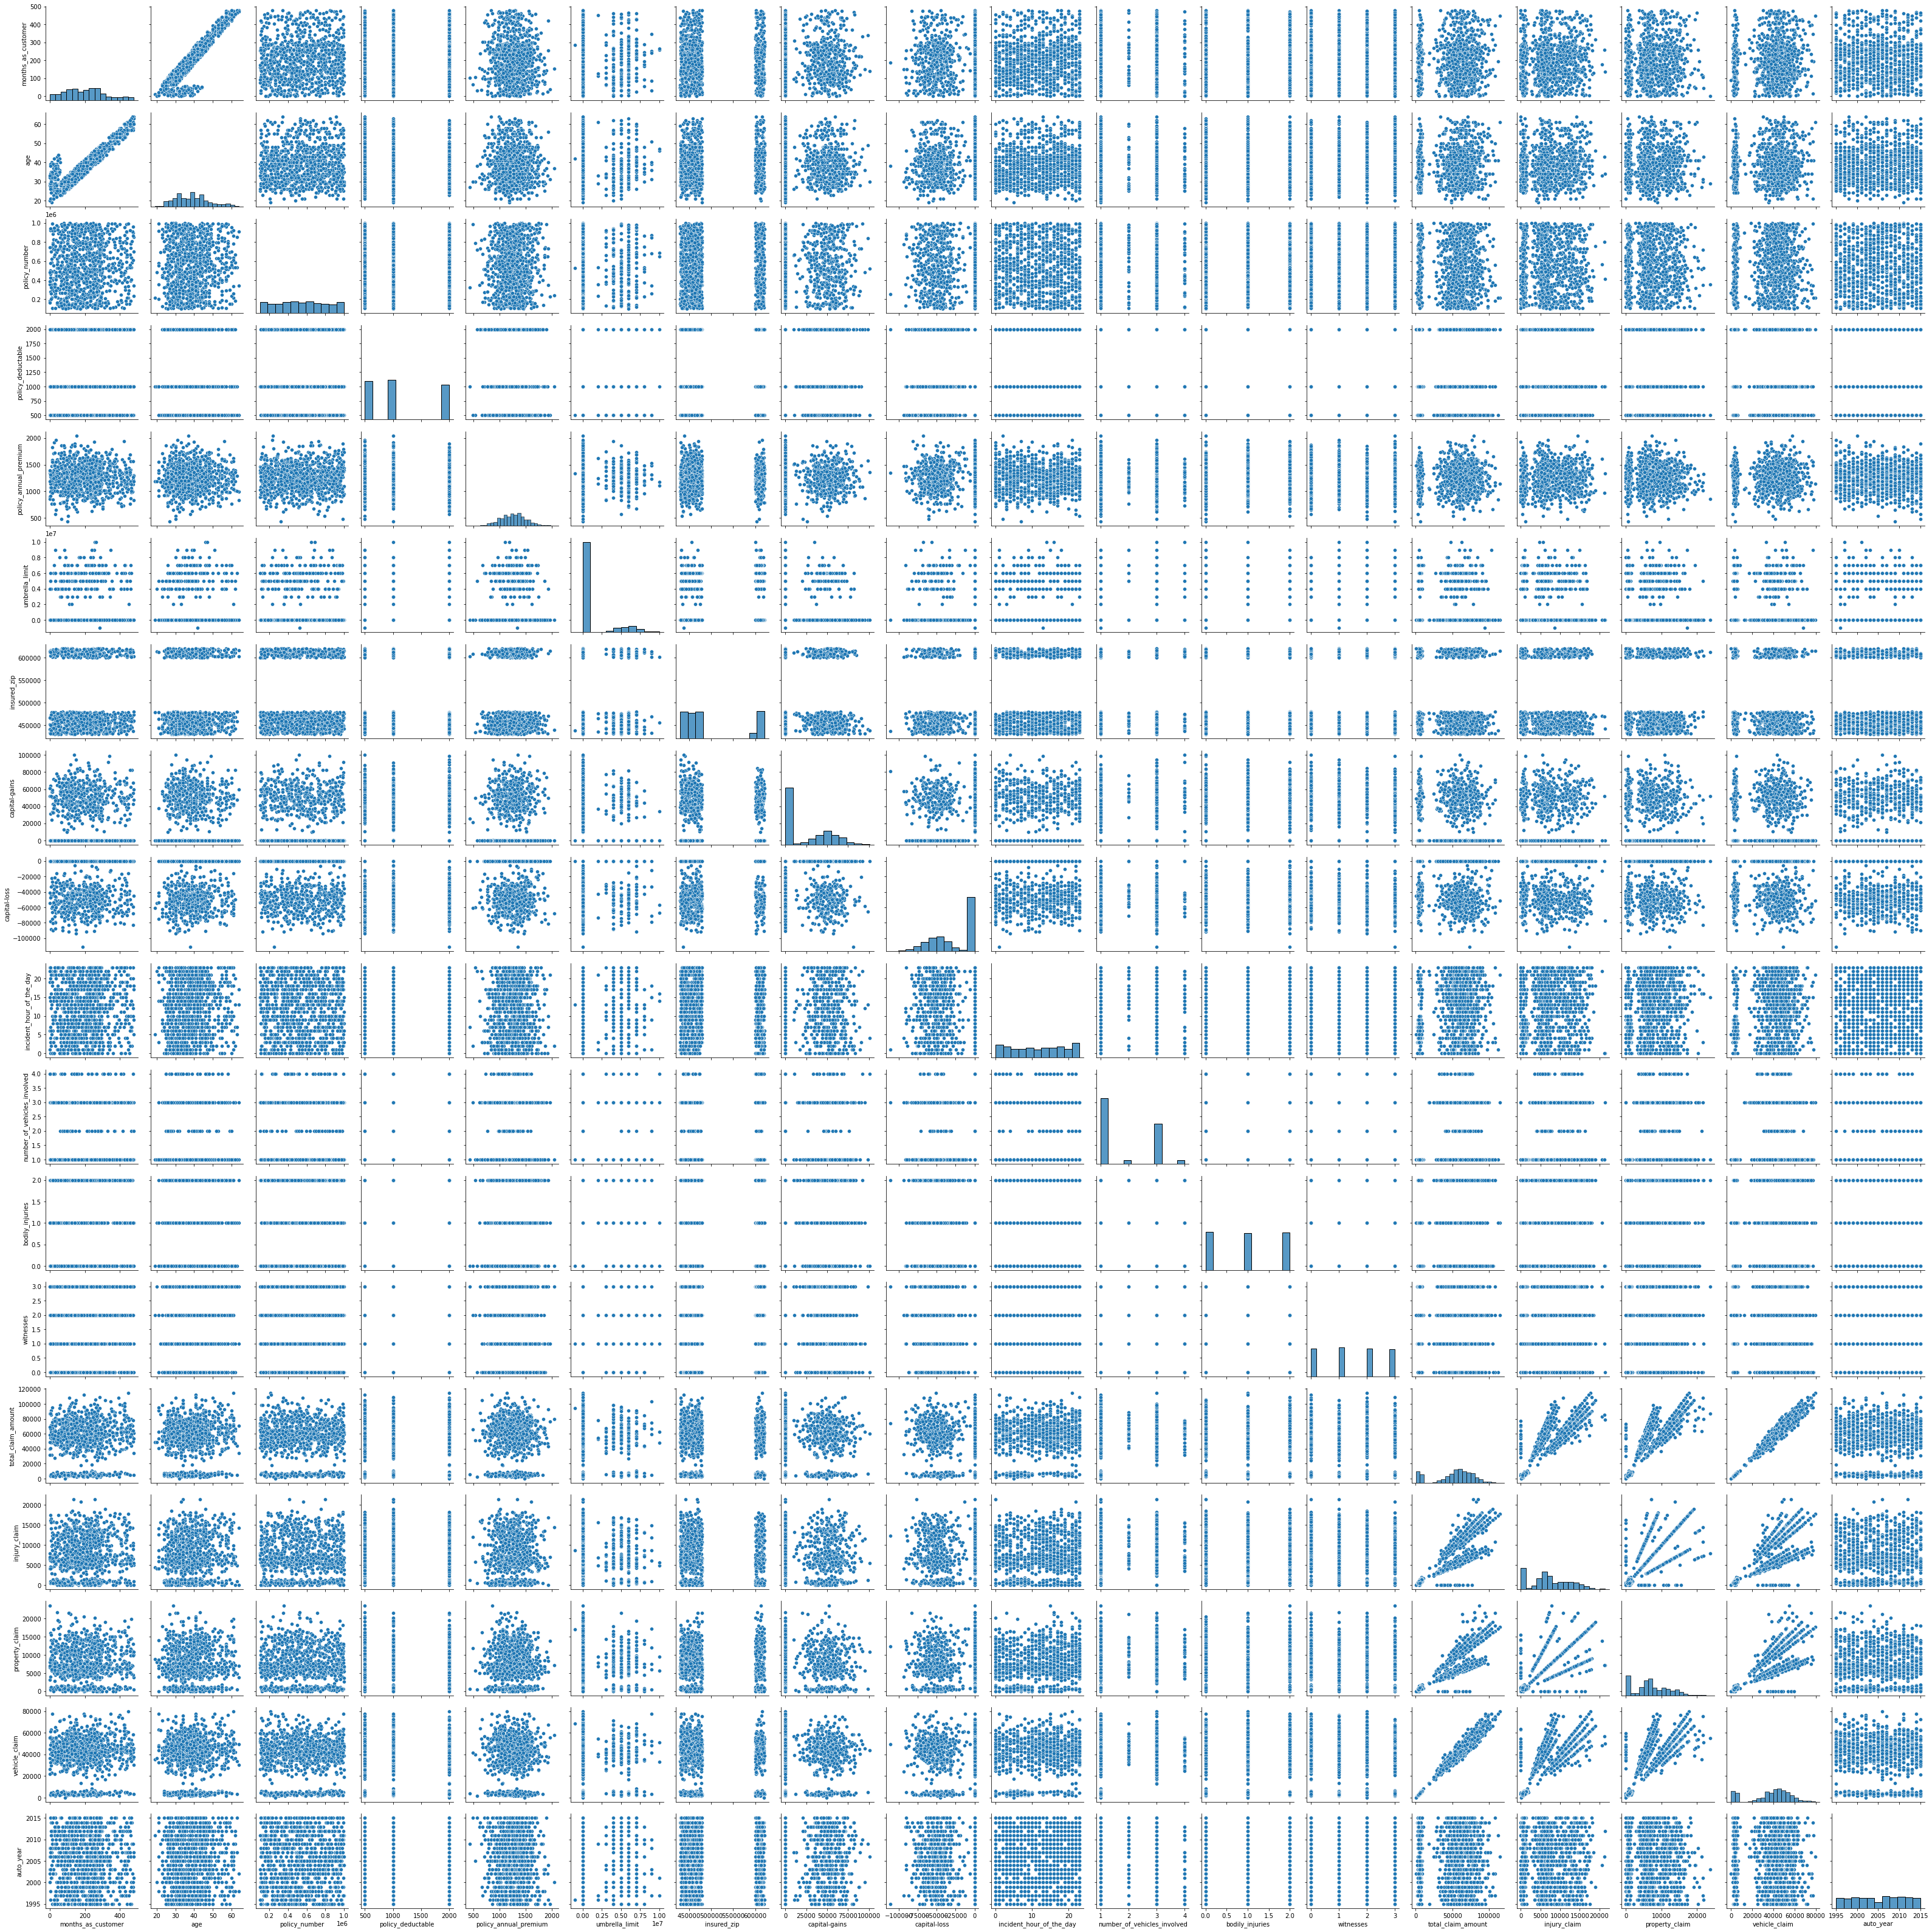

In [22]:
sns.pairplot(df)

<AxesSubplot:>

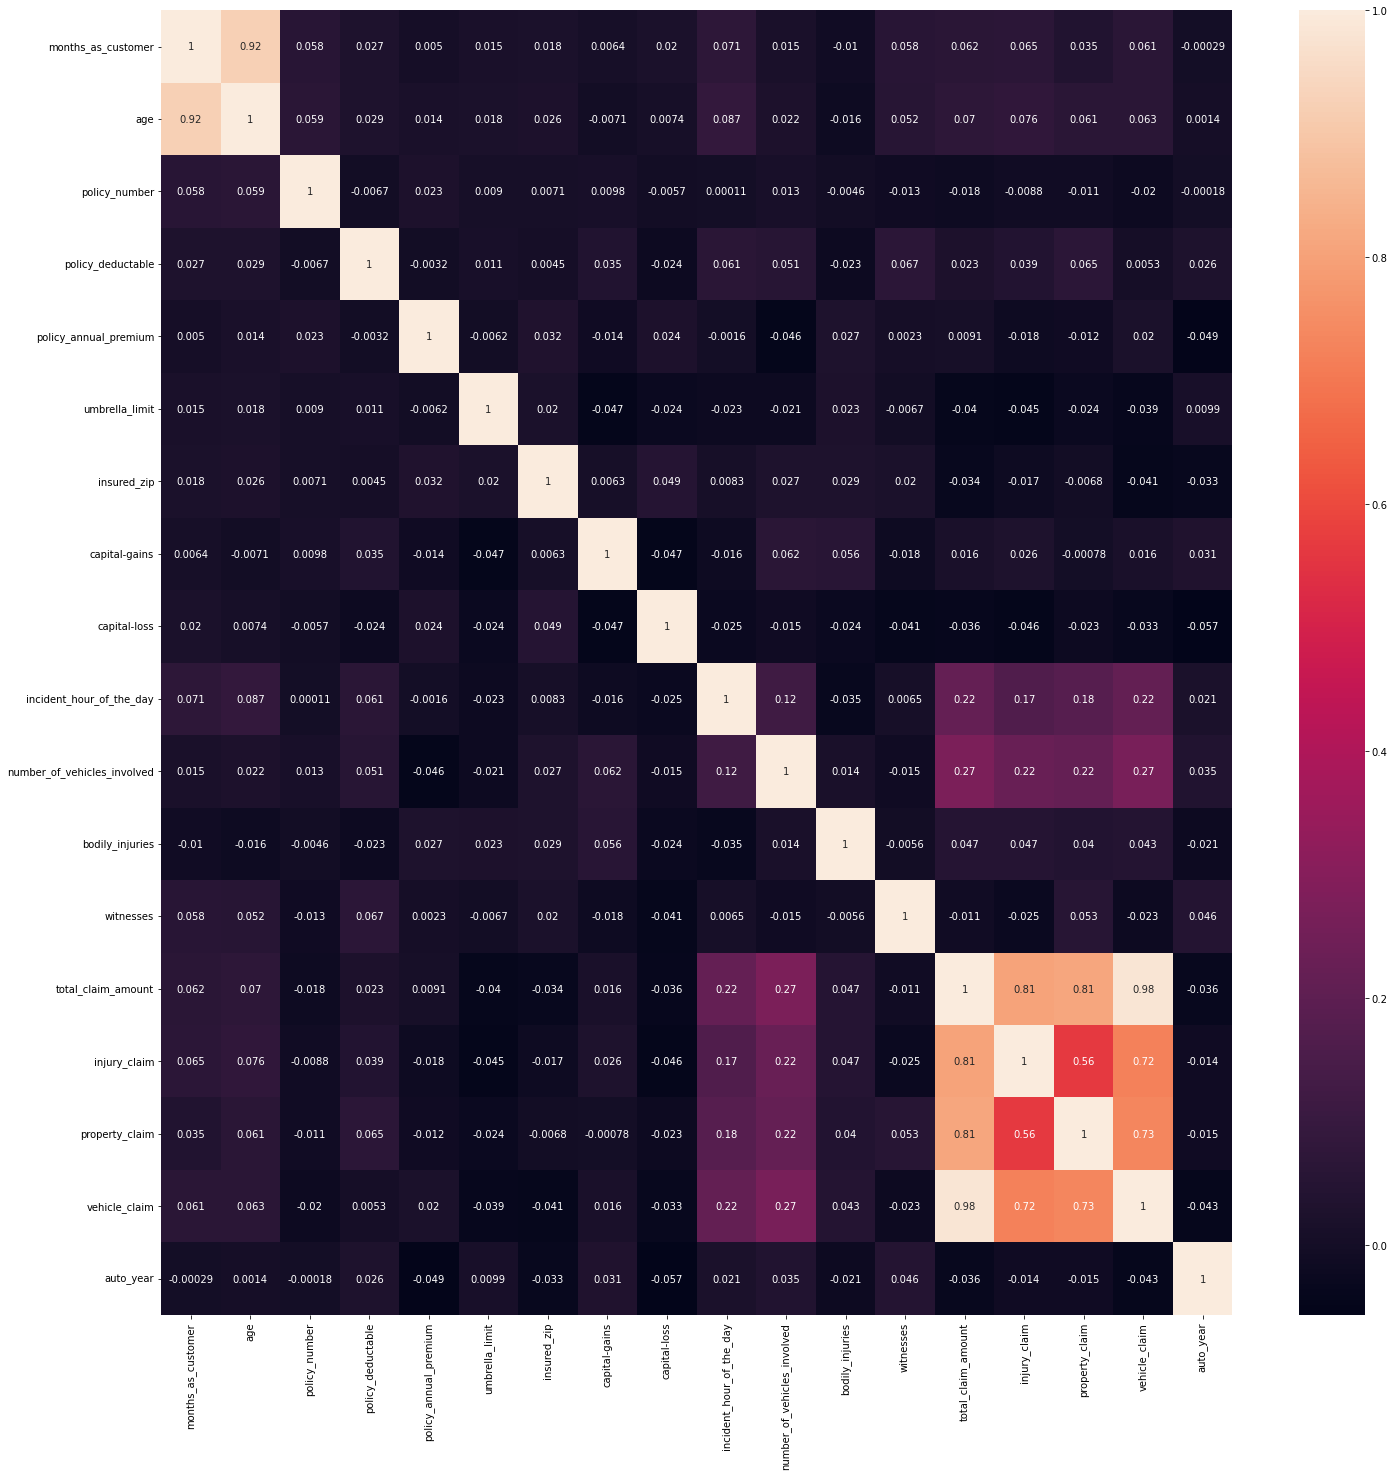

In [23]:
plt.figure(figsize=(24,24))
sns.heatmap(df.corr(), annot=True)

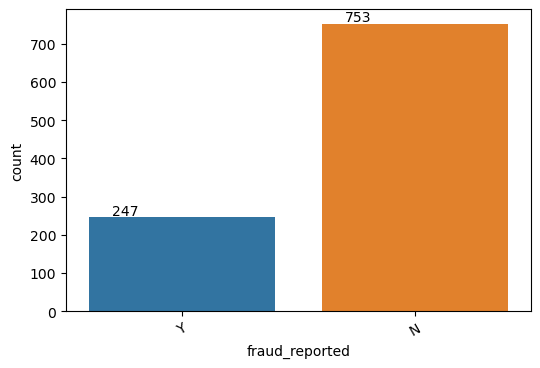

In [24]:
plt.figure(dpi=100)
plot = sns.countplot('fraud_reported',data=df)
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

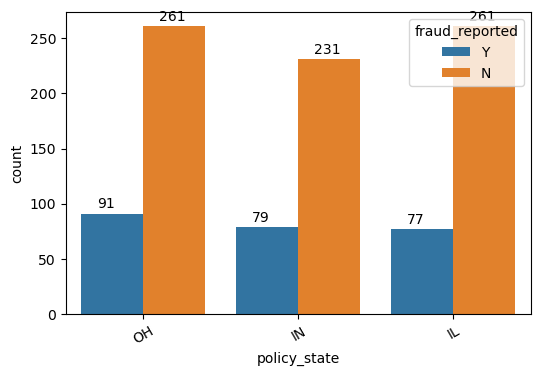

In [25]:
plt.figure(dpi=100)
plot = sns.countplot('policy_state',data=df, hue='fraud_reported')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

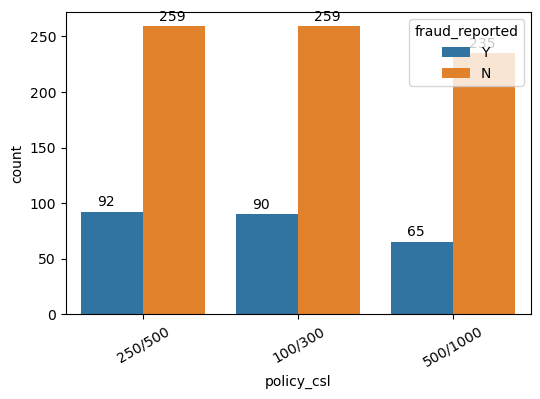

In [26]:
plt.figure(dpi=100)
plot = sns.countplot('policy_csl',data=df, hue='fraud_reported')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

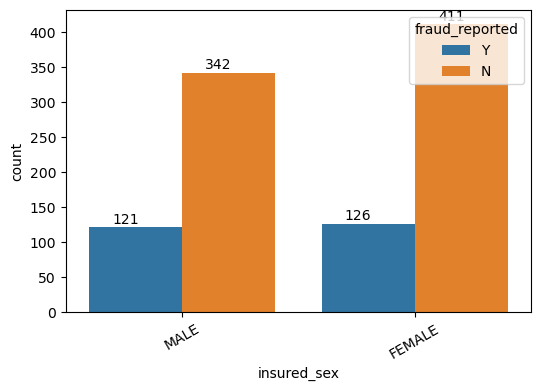

In [27]:
plt.figure(dpi=100)
plot = sns.countplot('insured_sex',data=df, hue='fraud_reported')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

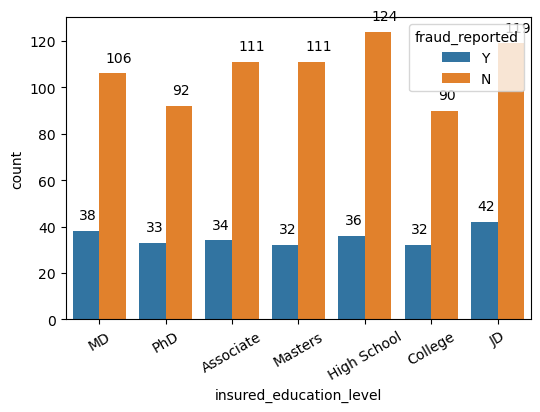

In [28]:
plt.figure(dpi=100)
plot = sns.countplot('insured_education_level',data=df, hue='fraud_reported')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

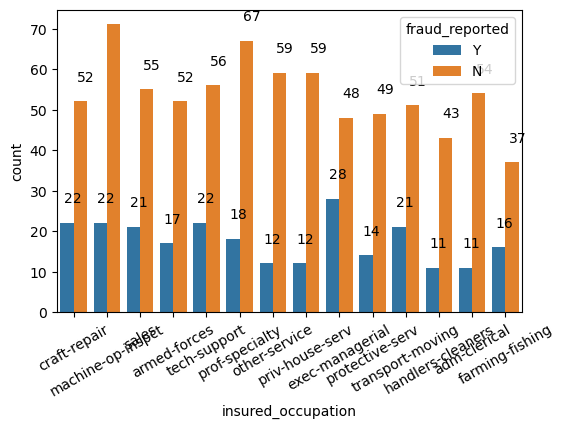

In [29]:
plt.figure(dpi=100)
plot = sns.countplot('insured_occupation',data=df, hue='fraud_reported')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

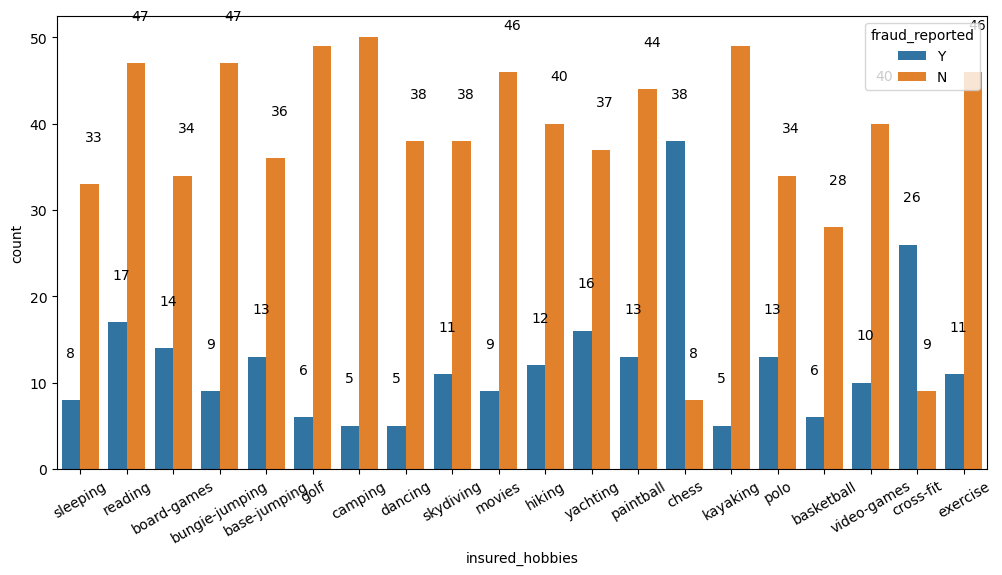

In [30]:
plt.figure(dpi=100, figsize=(12, 6))
plot = sns.countplot('insured_hobbies',data=df, hue='fraud_reported')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

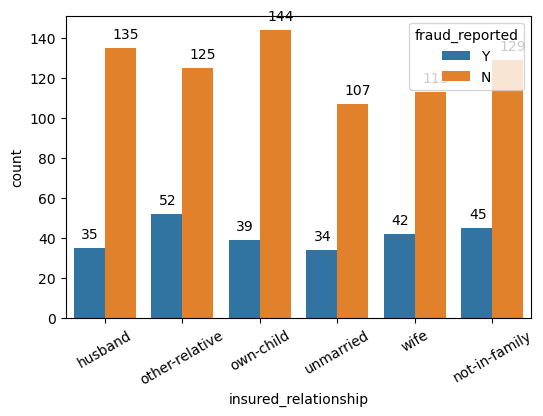

In [31]:
plt.figure(dpi=100)
plot = sns.countplot('insured_relationship',data=df, hue='fraud_reported')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

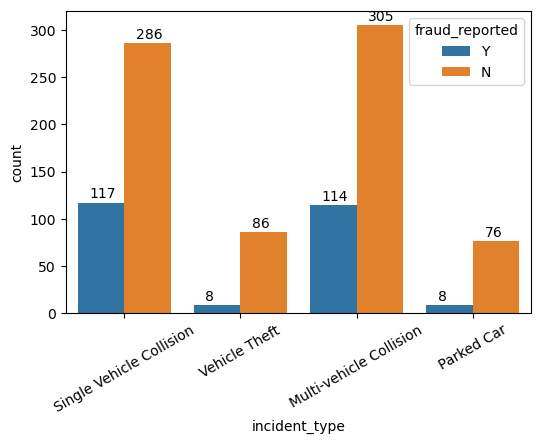

In [32]:
plt.figure(dpi=100)
plot = sns.countplot('incident_type',data=df, hue='fraud_reported')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

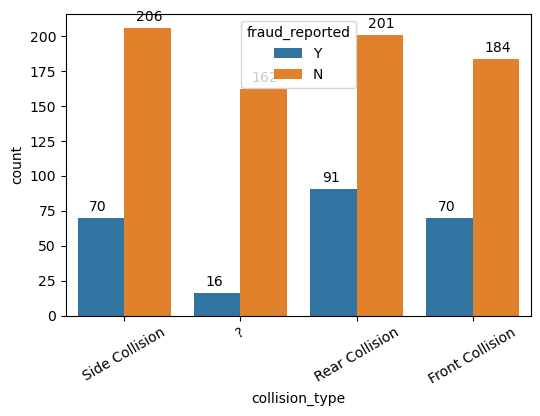

In [33]:
plt.figure(dpi=100)
plot = sns.countplot('collision_type',data=df, hue='fraud_reported')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

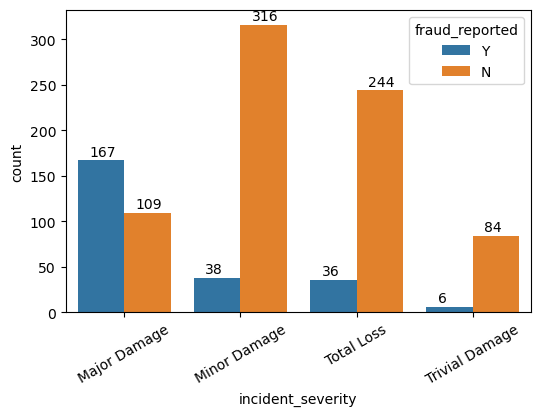

In [34]:
plt.figure(dpi=100)
plot = sns.countplot('incident_severity',data=df, hue='fraud_reported')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

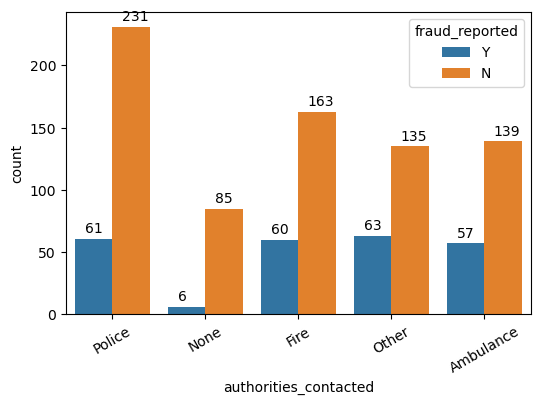

In [35]:
plt.figure(dpi=100)
plot = sns.countplot('authorities_contacted',data=df, hue='fraud_reported')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

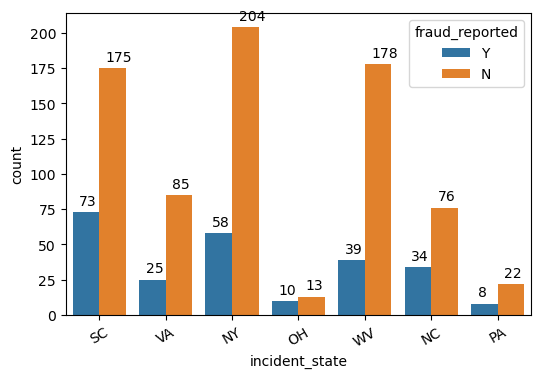

In [36]:
plt.figure(dpi=100)
plot = sns.countplot('incident_state',data=df, hue='fraud_reported')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

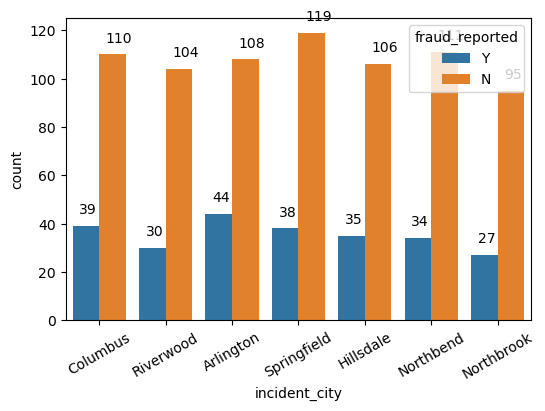

In [37]:
plt.figure(dpi=100)
plot = sns.countplot('incident_city',data=df, hue='fraud_reported')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

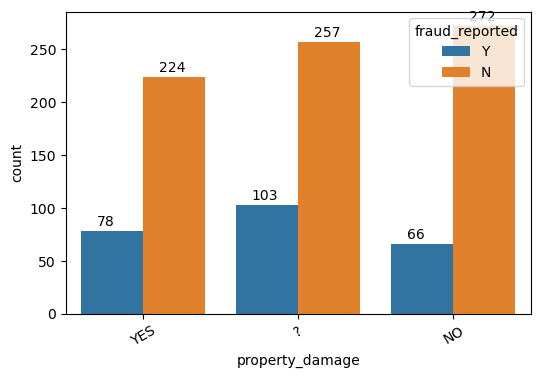

In [38]:
plt.figure(dpi=100)
plot = sns.countplot('property_damage',data=df, hue='fraud_reported')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

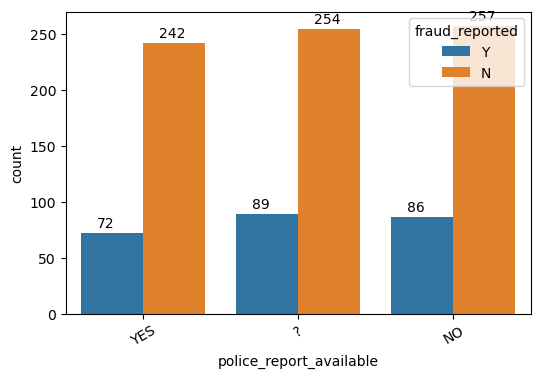

In [39]:
plt.figure(dpi=100)
plot = sns.countplot('police_report_available',data=df, hue='fraud_reported')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

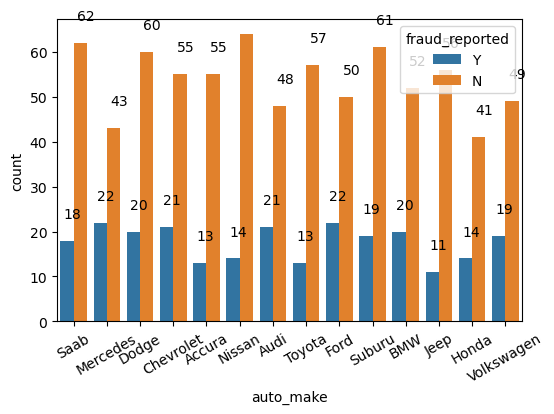

In [40]:
plt.figure(dpi=100)
plot = sns.countplot('auto_make',data=df, hue='fraud_reported')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

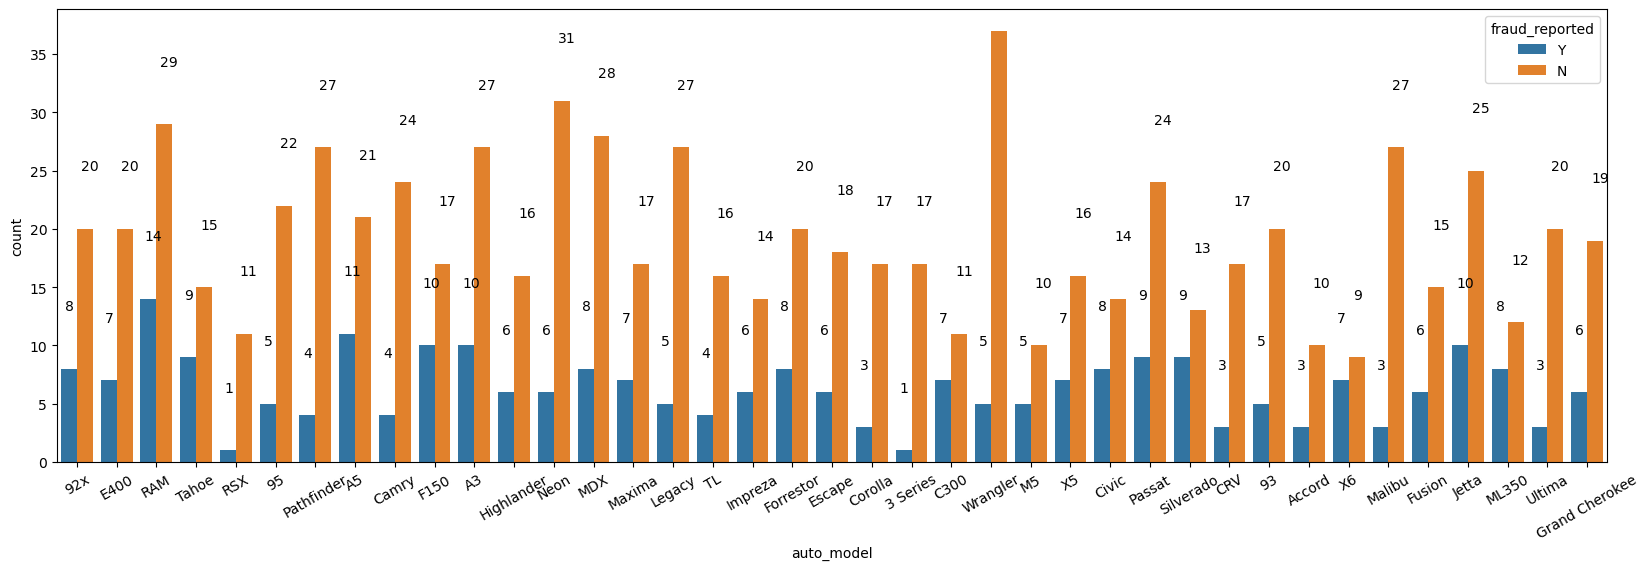

In [41]:
plt.figure(dpi=100, figsize=(20, 6))
plot = sns.countplot('auto_model',data=df, hue='fraud_reported')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

In [42]:
for column in categorical_features:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print("==========================================================")

policy_bind_date: Number of unique values 951
policy_state: Number of unique values 3
policy_csl: Number of unique values 3
insured_sex: Number of unique values 2
insured_education_level: Number of unique values 7
insured_occupation: Number of unique values 14
insured_hobbies: Number of unique values 20
insured_relationship: Number of unique values 6
incident_date: Number of unique values 60
incident_type: Number of unique values 4
collision_type: Number of unique values 4
incident_severity: Number of unique values 4
authorities_contacted: Number of unique values 5
incident_state: Number of unique values 7
incident_city: Number of unique values 7
incident_location: Number of unique values 1000
property_damage: Number of unique values 3
police_report_available: Number of unique values 3
auto_make: Number of unique values 14
auto_model: Number of unique values 39
fraud_reported: Number of unique values 2


### Observation - 
Dropping 
   - policy_bind_date
   - incident_location
   - auto_model
   - incident_date

In [43]:
df.drop('policy_bind_date', axis=1, inplace=True)

In [44]:
df.drop('incident_location', axis=1, inplace=True)
df.drop('auto_model', axis=1, inplace=True)
df.drop('incident_date', axis=1, inplace=True)

In [45]:
df.head()

months_as_customer  age  policy_number policy_state policy_csl  \
0                 328   48         521585           OH    250/500   
1                 228   42         342868           IN    250/500   
2                 134   29         687698           OH    100/300   
3                 256   41         227811           IL    250/500   
4                 228   44         367455           IL   500/1000   

   policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  \
0               1000                1406.91               0       466132   
1               2000                1197.22         5000000       468176   
2               2000                1413.14         5000000       430632   
3               2000                1415.74         6000000       608117   
4               1000                1583.91         6000000       610706   

  insured_sex insured_education_level insured_occupation insured_hobbies  \
0        MALE                      MD       craft-repair        sleeping   
1        MALE                      MD  machine-op-inspct         reading   
2      FEMALE                     PhD              sales     board-games   
3      FEMALE                     PhD       armed-forces     board-games   
4        MALE               Associate              sales     board-games   

  insured_relationship  capital-gains  capital-loss             incident_type  \
0              husband          53300             0  Single Vehicle Collision   
1       other-relative              0             0             Vehicle Theft   
2            own-child          35100             0   Multi-vehicle Collision   
3            unmarried          48900        -62400  Single Vehicle Collision   
4            unmarried          66000        -46000             Vehicle Theft   

    collision_type incident_severity authorities_contacted incident_state  \
0   Side Collision      Major Damage                Police             SC   
1                ?      Minor Damage                Police             VA   
2   Rear Collision      Minor Damage                Police             NY   
3  Front Collision      Major Damage                Police             OH   
4                ?      Minor Damage                  None             NY   

  incident_city  incident_hour_of_the_day  number_of_vehicles_involved  \
0      Columbus                         5                            1   
1     Riverwood                         8                            1   
2      Columbus                         7                            3   
3     Arlington                         5                            1   
4     Arlington                        20                            1   

  property_damage  bodily_injuries  witnesses police_report_available  \
0             YES                1          2                     YES   
1               ?                0          0                       ?   
2              NO                2          3                      NO   
3               ?                1          2                      NO   
4              NO                0          1                      NO   

   total_claim_amount  injury_claim  property_claim  vehicle_claim  auto_make  \
0               71610          6510           13020          52080       Saab   
1                5070           780             780           3510   Mercedes   
2               34650          7700            3850          23100      Dodge   
3               63400          6340            6340          50720  Chevrolet   
4                6500          1300             650           4550     Accura   

   auto_year fraud_reported  
0       2004              Y  
1       2007              Y  
2       2007              N  
3       2014              Y  
4       2009              N

In [46]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == "O"]
numerical_features = [feature for feature in df.columns if df[feature].dtype != "O"]

In [47]:
print(f'Total Categorical Features are {len(categorical_features)}')
print(f'Total Numerical Features are {len(numerical_features)}')

Total Categorical Features are 17
Total Numerical Features are 18


## Handling Outliers

months_as_customer                AxesSubplot(0.125,0.787927;0.168478x0.0920732)
age                            AxesSubplot(0.327174,0.787927;0.168478x0.0920732)
policy_number                  AxesSubplot(0.529348,0.787927;0.168478x0.0920732)
policy_deductable              AxesSubplot(0.731522,0.787927;0.168478x0.0920732)
policy_annual_premium             AxesSubplot(0.125,0.677439;0.168478x0.0920732)
umbrella_limit                 AxesSubplot(0.327174,0.677439;0.168478x0.0920732)
insured_zip                    AxesSubplot(0.529348,0.677439;0.168478x0.0920732)
capital-gains                  AxesSubplot(0.731522,0.677439;0.168478x0.0920732)
capital-loss                      AxesSubplot(0.125,0.566951;0.168478x0.0920732)
incident_hour_of_the_day       AxesSubplot(0.327174,0.566951;0.168478x0.0920732)
number_of_vehicles_involved    AxesSubplot(0.529348,0.566951;0.168478x0.0920732)
bodily_injuries                AxesSubplot(0.731522,0.566951;0.168478x0.0920732)
witnesses                   

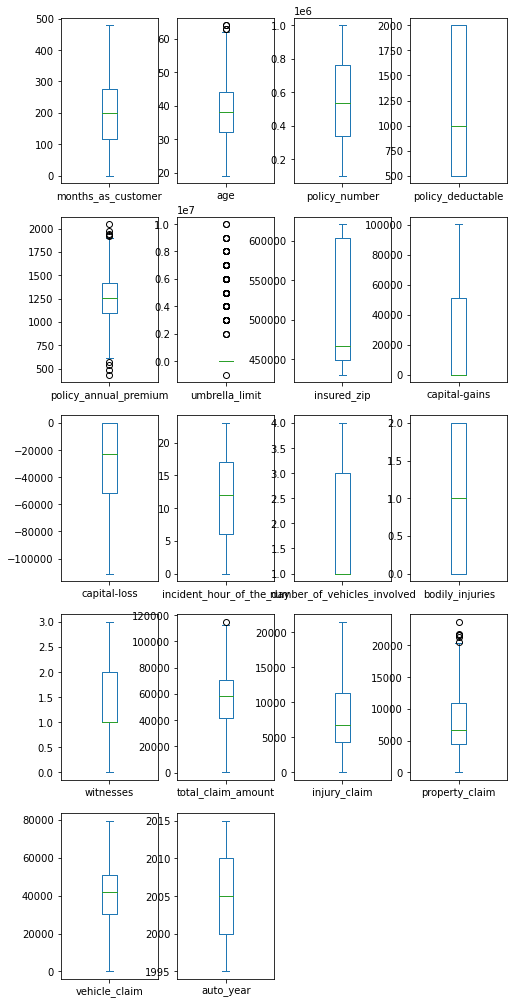

In [48]:
df.plot(kind='box',subplots=True,figsize=(8,25),layout=(7,4))
# plotting individual graph for better understanding of graph

In [49]:
cols_with_outliers = ['age', 'property_claim', 'umbrella_limit', 'policy_annual_premium', 'total_claim_amount']

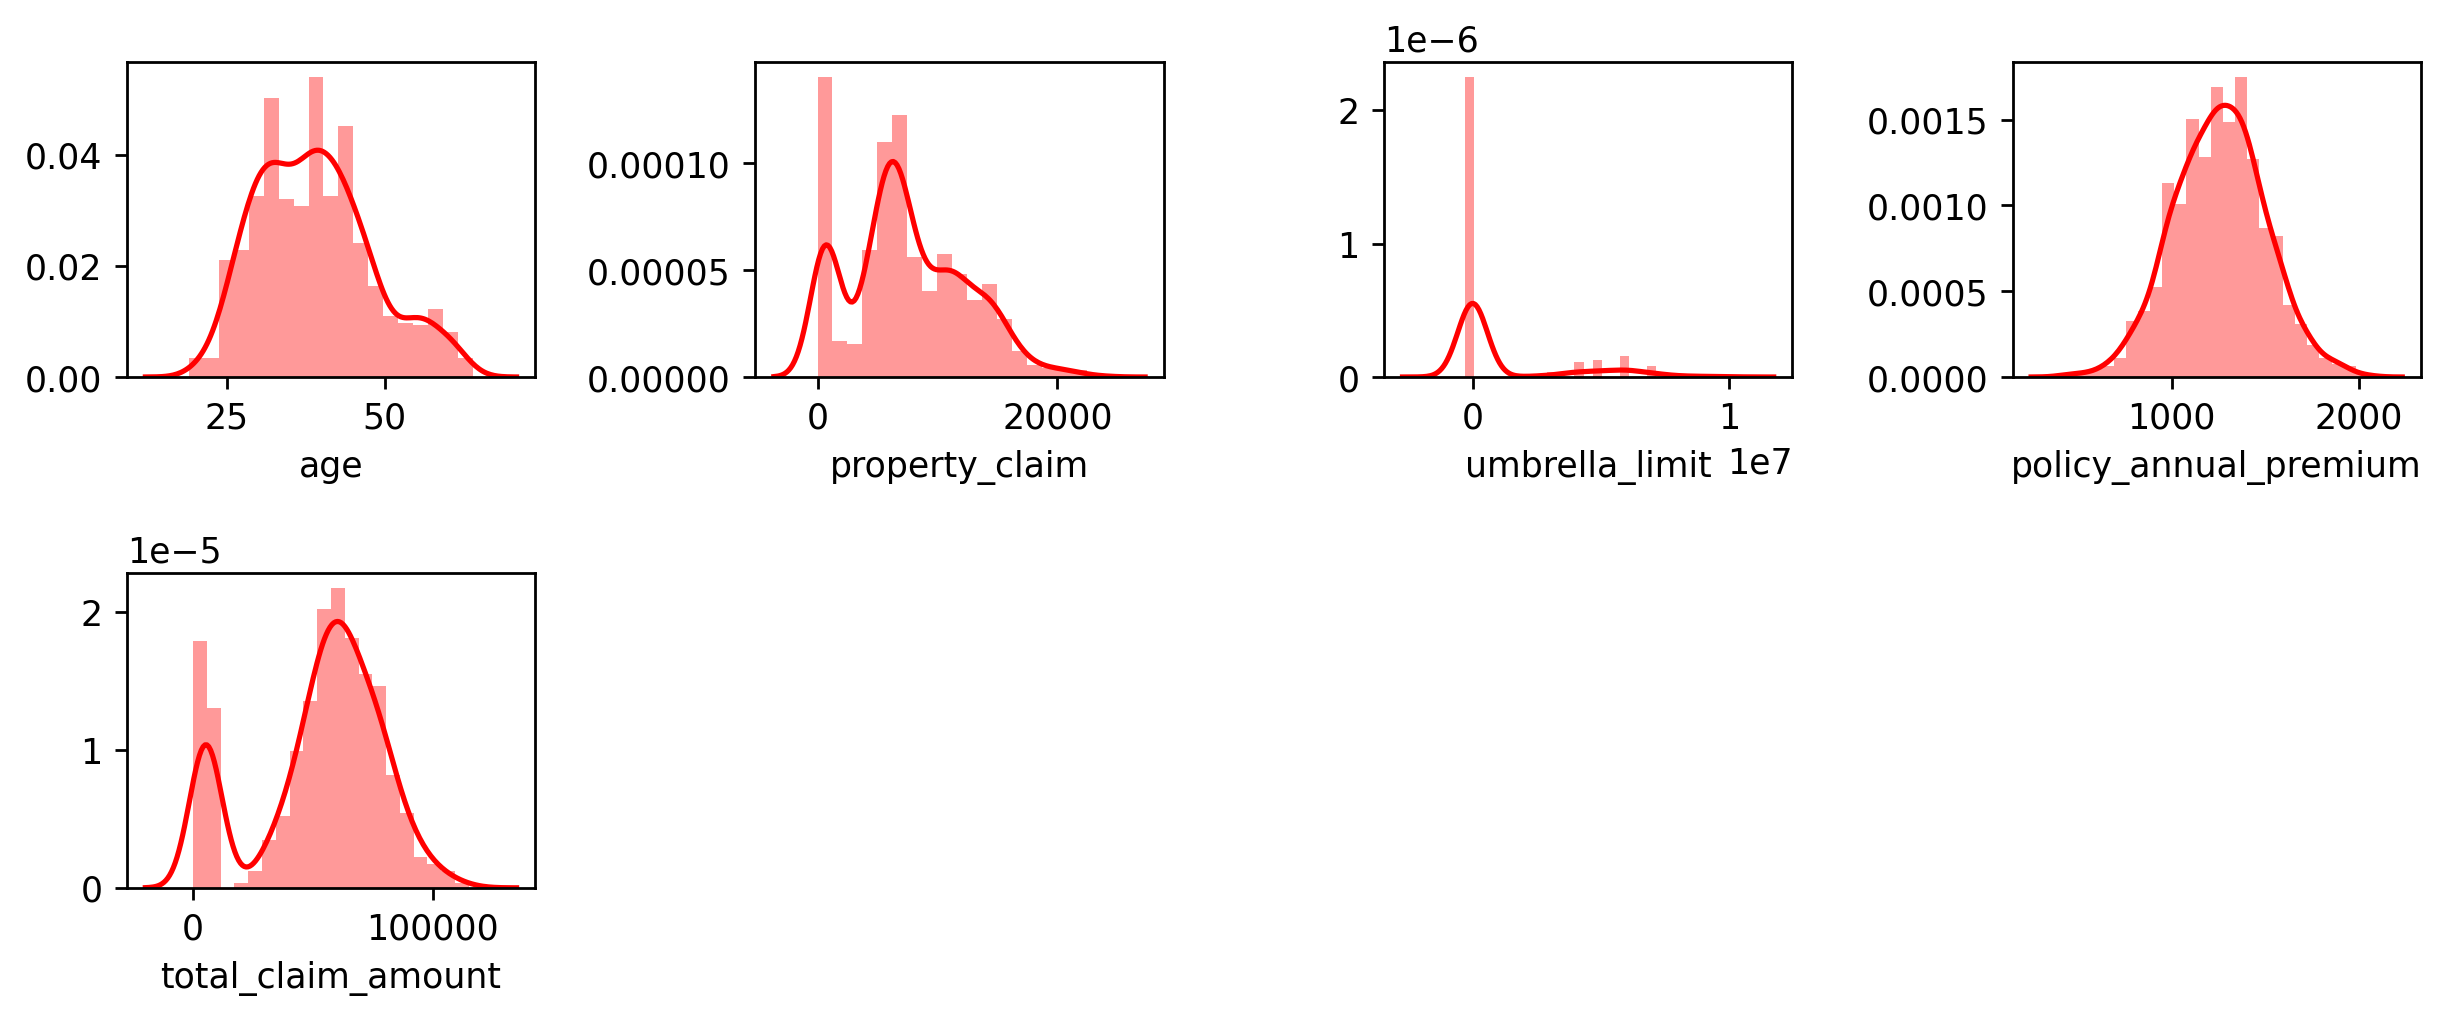

In [50]:
plt.figure(figsize = (10, 10), dpi=250)
for i in range(0, len(cols_with_outliers)):
    plt.subplot(5, 4, i+1)
    sns.distplot(df[cols_with_outliers[i]], color = 'red')
    plt.ylabel('')

# plt.suptitle('Outliers Before Cleansing', y = 0.1)
plt.tight_layout(pad = 1.5)
plt.show()

In [51]:
for feature in cols_with_outliers:
    IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)
    upper_bond = df[feature].quantile(0.75) + (IQR * 1.5)
    lower_bond = df[feature].quantile(0.25) - (IQR * 1.5)
    
    df[feature] = np.where(df[feature]>upper_bond,upper_bond,df[feature])
    df[feature] = np.where(df[feature]<lower_bond,lower_bond,df[feature])

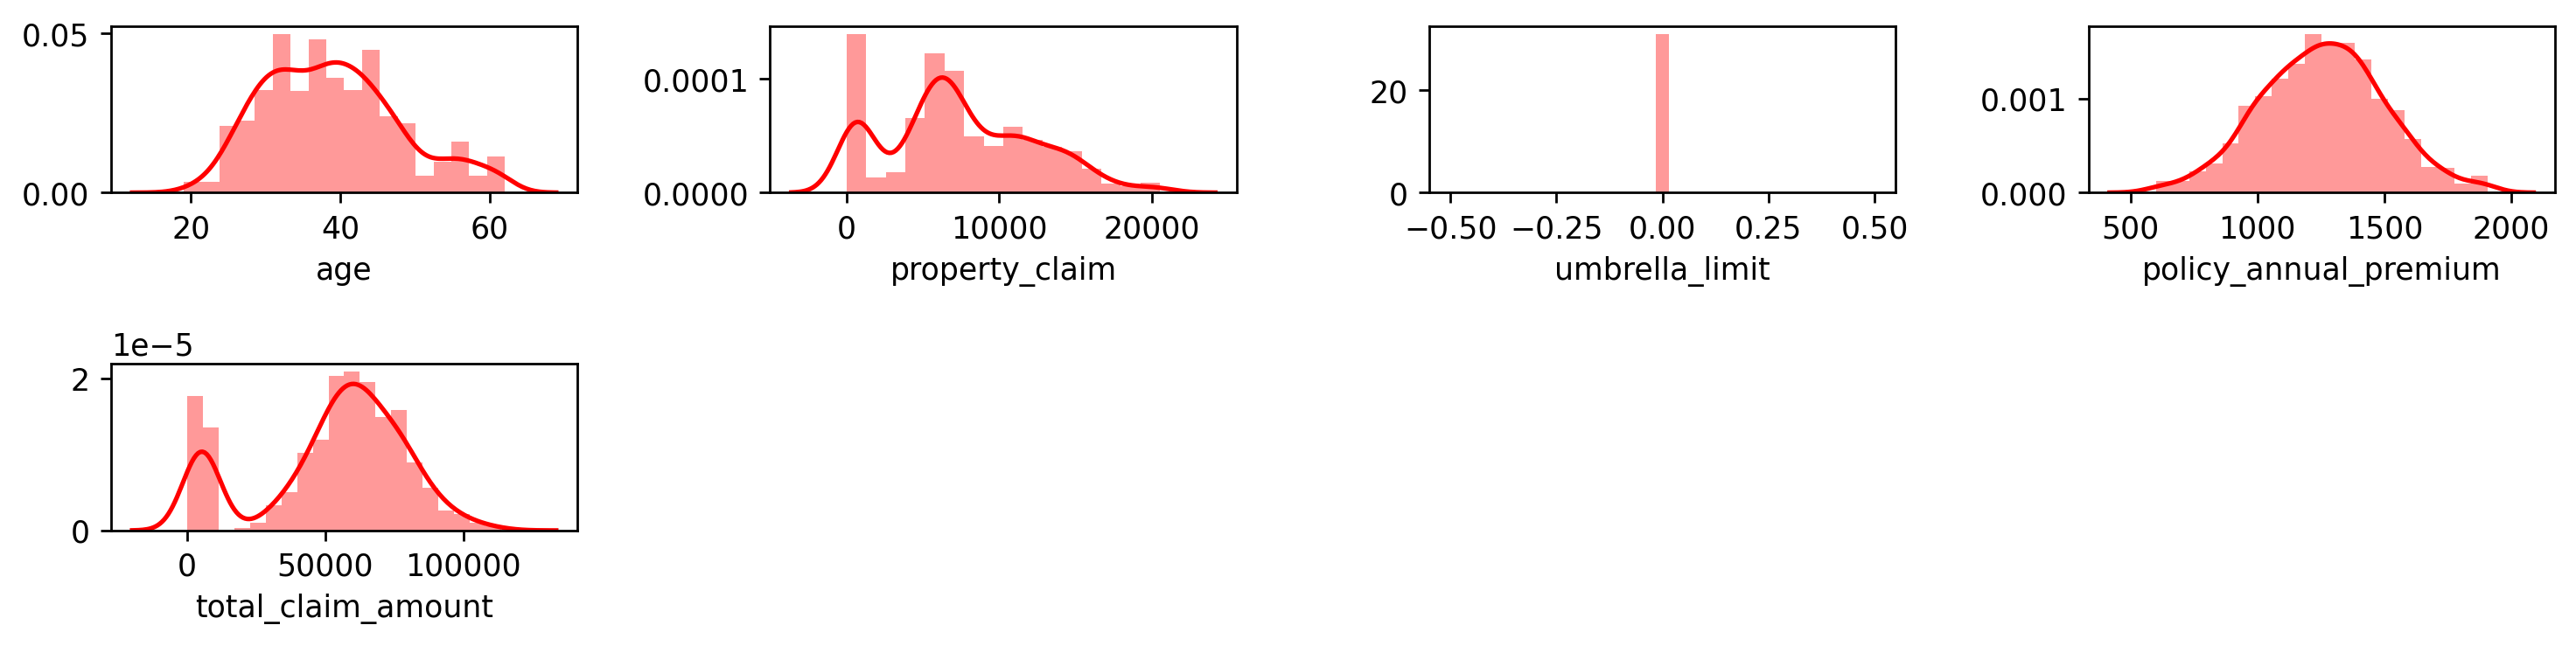

In [52]:
plt.figure(figsize = (12, 12), dpi=250)
for i in range(0, len(cols_with_outliers)):
    plt.subplot(8, 4, i+1)
    sns.distplot(df[cols_with_outliers[i]], color = 'red')
    plt.ylabel('')

# plt.suptitle('Outliers Before Cleansing', y = 0.05)
plt.tight_layout(pad = 1.5)
plt.show()

In [53]:
df.drop('umbrella_limit', axis=1, inplace=True)

months_as_customer                AxesSubplot(0.125,0.787927;0.168478x0.0920732)
age                            AxesSubplot(0.327174,0.787927;0.168478x0.0920732)
policy_number                  AxesSubplot(0.529348,0.787927;0.168478x0.0920732)
policy_deductable              AxesSubplot(0.731522,0.787927;0.168478x0.0920732)
policy_annual_premium             AxesSubplot(0.125,0.677439;0.168478x0.0920732)
insured_zip                    AxesSubplot(0.327174,0.677439;0.168478x0.0920732)
capital-gains                  AxesSubplot(0.529348,0.677439;0.168478x0.0920732)
capital-loss                   AxesSubplot(0.731522,0.677439;0.168478x0.0920732)
incident_hour_of_the_day          AxesSubplot(0.125,0.566951;0.168478x0.0920732)
number_of_vehicles_involved    AxesSubplot(0.327174,0.566951;0.168478x0.0920732)
bodily_injuries                AxesSubplot(0.529348,0.566951;0.168478x0.0920732)
witnesses                      AxesSubplot(0.731522,0.566951;0.168478x0.0920732)
total_claim_amount          

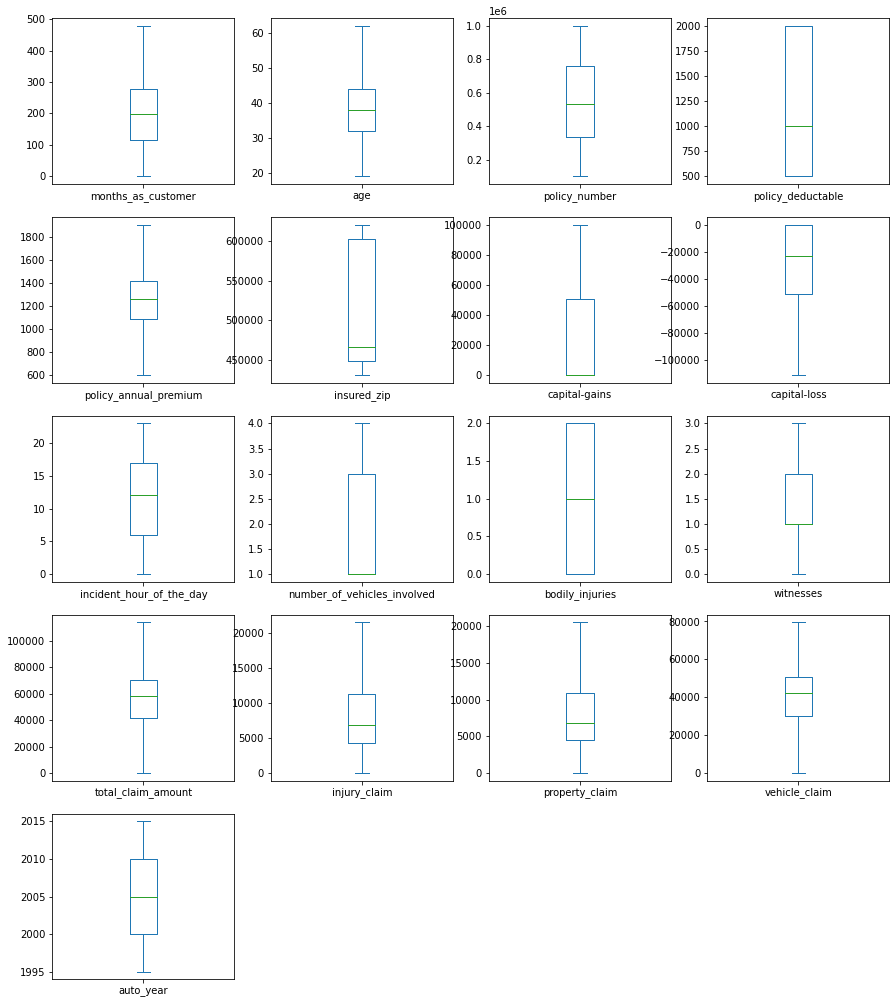

In [54]:
df.plot(kind='box',subplots=True,figsize=(15,25),layout=(7,4))
# plotting individual graph for better understanding of graph

<AxesSubplot:>

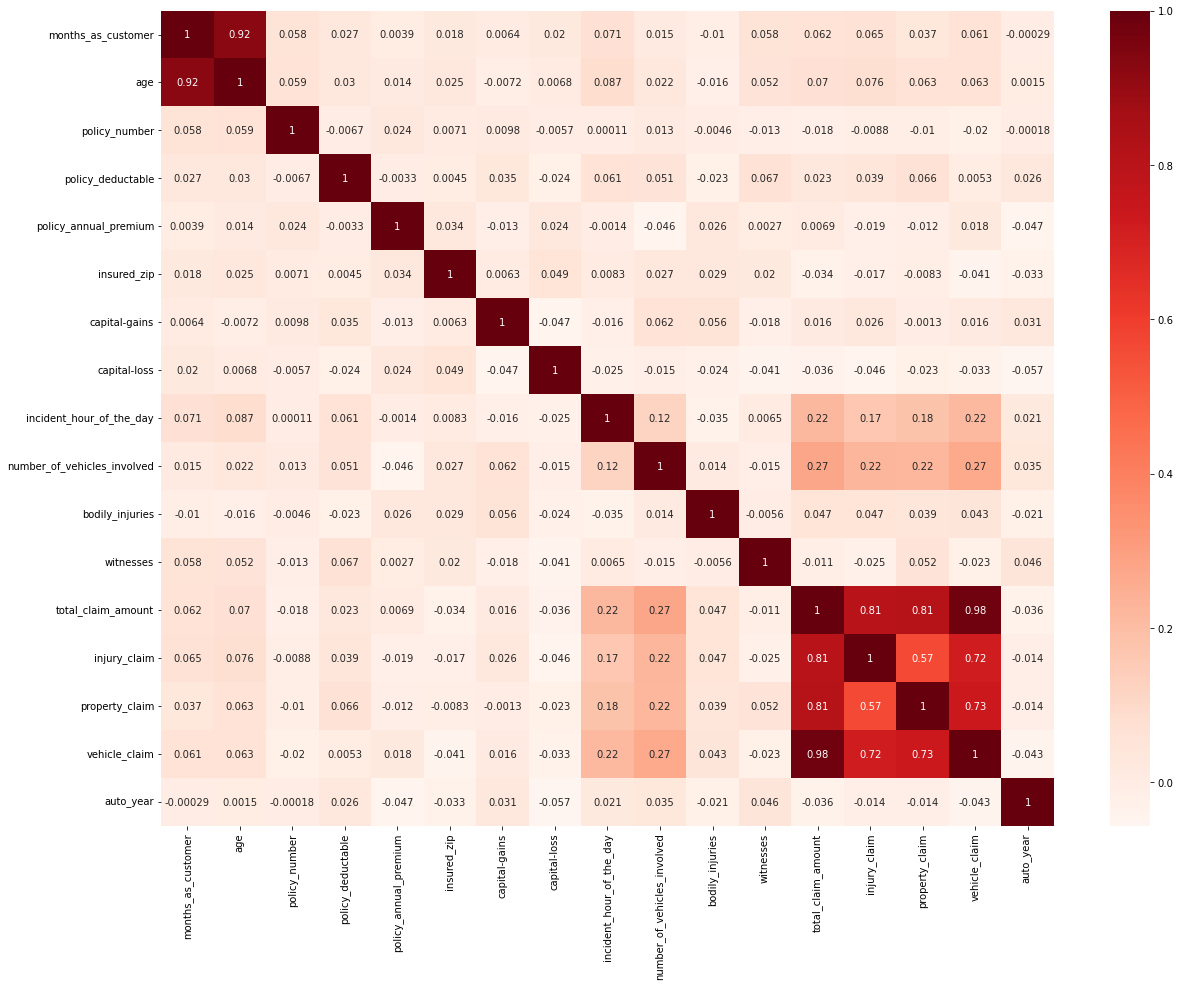

In [55]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),cmap='Reds',annot=True)

In [56]:
df.skew().sort_values()

vehicle_claim                 -0.621098
total_claim_amount            -0.595351
capital-loss                  -0.391472
auto_year                     -0.048289
incident_hour_of_the_day      -0.035584
bodily_injuries                0.014777
policy_annual_premium          0.016003
witnesses                      0.019636
policy_number                  0.038991
injury_claim                   0.264811
property_claim                 0.348531
months_as_customer             0.362177
age                            0.469878
policy_deductable              0.477887
capital-gains                  0.478850
number_of_vehicles_involved    0.502664
insured_zip                    0.816554
dtype: float64

In [57]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == "O"]
numerical_features = [feature for feature in df.columns if df[feature].dtype != "O"]

In [58]:
print(f'Total Categorical Features are {len(categorical_features)}')
print(f'Total Numerical Features are {len(numerical_features)}')

Total Categorical Features are 17
Total Numerical Features are 17


In [59]:
#removal of skew-ness using log function
for col in numerical_features:
    if df.skew().loc[col]>0.3:
        df[col]=np.log1p(df[col])

In [60]:
df.skew().sort_values()

property_claim                -3.204259
months_as_customer            -1.939217
vehicle_claim                 -0.621098
total_claim_amount            -0.595351
capital-loss                  -0.391472
auto_year                     -0.048289
incident_hour_of_the_day      -0.035584
age                           -0.033549
bodily_injuries                0.014777
policy_annual_premium          0.016003
witnesses                      0.019636
policy_number                  0.038991
capital-gains                  0.039444
policy_deductable              0.063978
injury_claim                   0.264811
number_of_vehicles_involved    0.421516
insured_zip                    0.782405
dtype: float64

<AxesSubplot:>

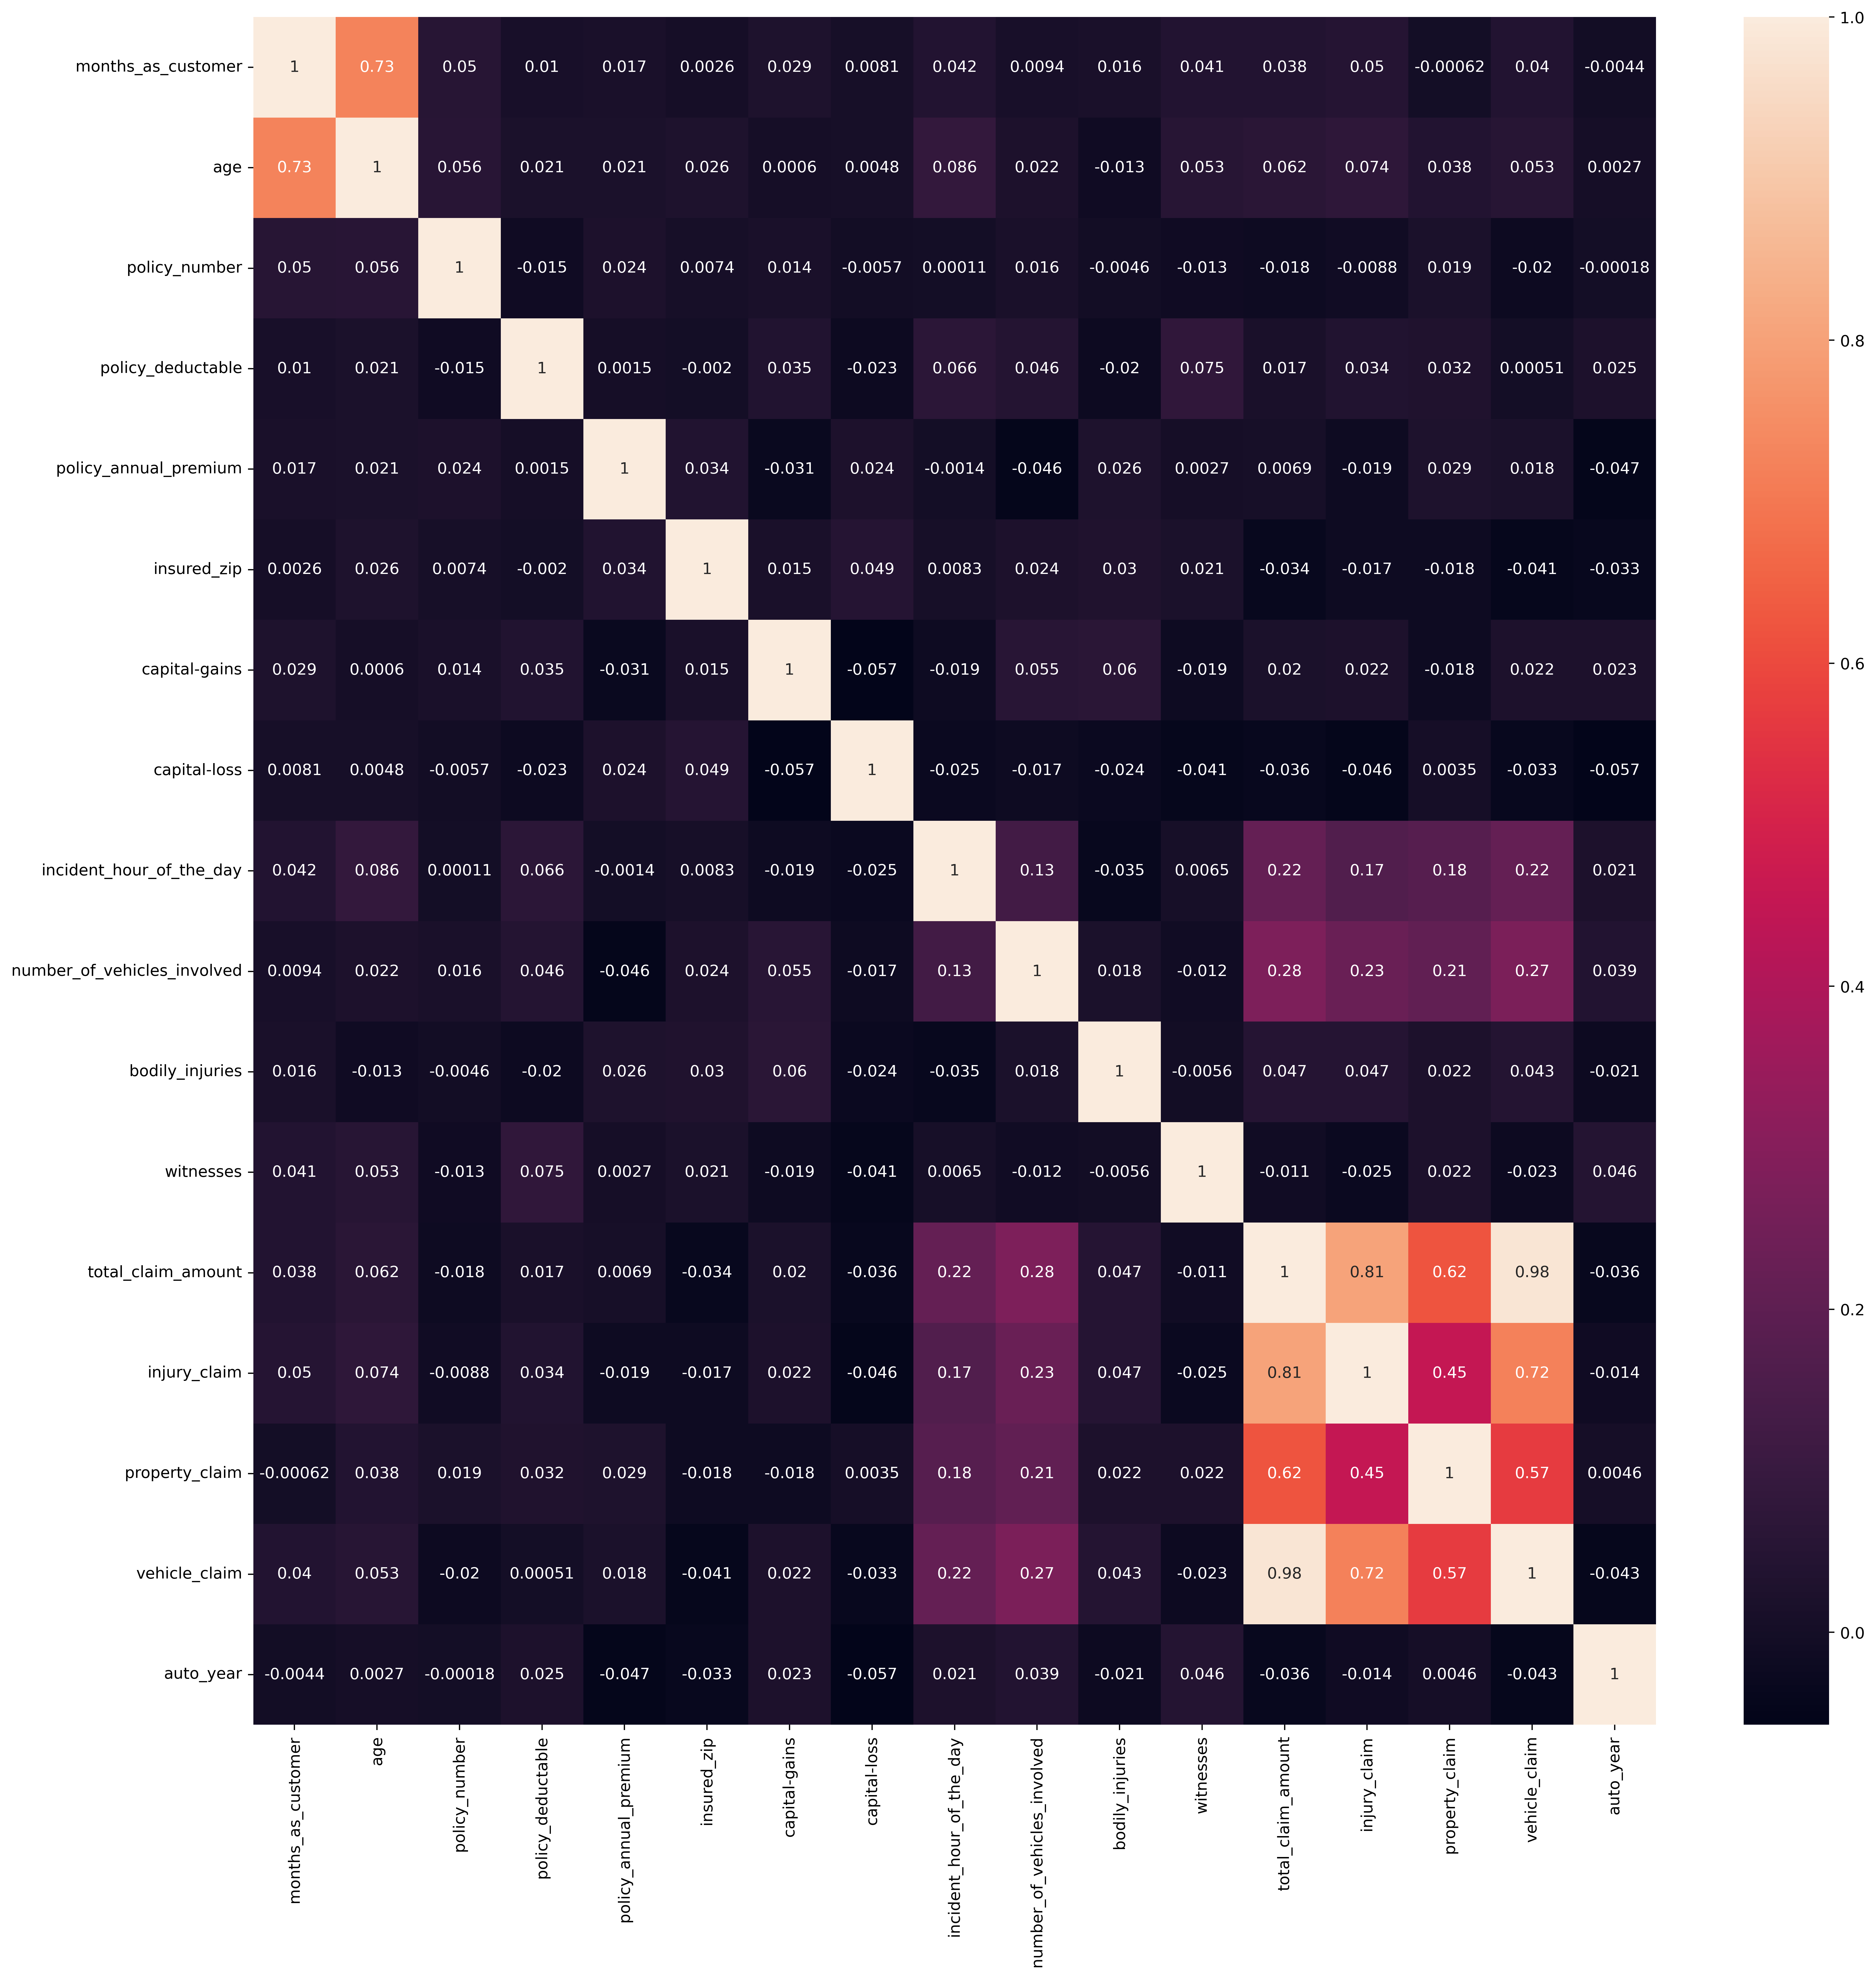

In [61]:
plt.figure(figsize=(20,20), dpi=400)
sns.heatmap(df.corr(), annot=True)

In [62]:
label_=LabelEncoder()

for i in categorical_features:
    df[i]=label_.fit_transform(df[i])

In [63]:
y = df['fraud_reported']

In [64]:
y

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 1000, dtype: int32

In [65]:
df.drop('fraud_reported', axis=1, inplace=True)
x = df.copy()

In [66]:
x.head()

months_as_customer       age  policy_number  policy_state  policy_csl  \
0            5.796058  3.891820         521585             2           1   
1            5.433722  3.761200         342868             1           1   
2            4.905275  3.401197         687698             2           0   
3            5.549076  3.737670         227811             0           1   
4            5.433722  3.806662         367455             0           2   

   policy_deductable  policy_annual_premium  insured_zip  insured_sex  \
0           6.908755                1406.91    13.052226            1   
1           7.601402                1197.22    13.056602            1   
2           7.601402                1413.14    12.973011            0   
3           7.601402                1415.74    13.318124            0   
4           6.908755                1583.91    13.322373            1   

   insured_education_level  insured_occupation  insured_hobbies  \
0                        4                   2               17   
1                        4                   6               15   
2                        6                  11                2   
3                        6                   1                2   
4                        0                  11                2   

   insured_relationship  capital-gains  capital-loss  incident_type  \
0                     0      10.883710             0              2   
1                     2       0.000000             0              3   
2                     3      10.465985             0              0   
3                     4      10.797553        -62400              2   
4                     4      11.097425        -46000              3   

   collision_type  incident_severity  authorities_contacted  incident_state  \
0               3                  0                      4               4   
1               0                  1                      4               5   
2               2                  1                      4               1   
3               1                  0                      4               2   
4               0                  1                      2               1   

   incident_city  incident_hour_of_the_day  number_of_vehicles_involved  \
0              1                         5                     0.693147   
1              5                         8                     0.693147   
2              1                         7                     1.386294   
3              0                         5                     0.693147   
4              0                        20                     0.693147   

   property_damage  bodily_injuries  witnesses  police_report_available  \
0                2                1          2                        2   
1                0                0          0                        0   
2                1                2          3                        1   
3                0                1          2                        1   
4                1                0          1                        1   

   total_claim_amount  injury_claim  property_claim  vehicle_claim  auto_make  \
0             71610.0          6510        9.474319          52080         10   
1              5070.0           780        6.660575           3510          8   
2             34650.0          7700        8.256088          23100          4   
3             63400.0          6340        8.754792          50720          3   
4              6500.0          1300        6.478510           4550          0   

   auto_year  
0       2004  
1       2007  
2       2007  
3       2014  
4       2009

In [67]:
categorical_features = [feature for feature in x.columns if x[feature].dtype == "O"]

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [69]:
def calc_vif(x1):
    vif=pd.DataFrame()
    vif["variables"]=x1.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])]
    return(vif)

In [70]:
calc_vif(x)

variables   VIF FACTOR
0            months_as_customer    75.390175
1                           age   564.795431
2                 policy_number     5.654492
3                  policy_state     2.576100
4                    policy_csl     2.455412
5             policy_deductable   158.912966
6         policy_annual_premium    29.047612
7                   insured_zip  8678.769801
8                   insured_sex     1.908903
9       insured_education_level     3.425287
10           insured_occupation     3.824010
11              insured_hobbies     4.149399
12         insured_relationship     3.179643
13                capital-gains     2.037561
14                 capital-loss     1.977916
15                incident_type    12.345220
16               collision_type     5.983488
17            incident_severity     3.127704
18        authorities_contacted     3.223308
19               incident_state     3.383343
20                incident_city     3.166511
21     incident_hour_of_the_day     4.201035
22  number_of_vehicles_involved    51.841199
23              property_damage     2.426138
24              bodily_injuries     2.521345
25                    witnesses     2.894214
26      police_report_available     2.503984
27           total_claim_amount   486.410905
28                 injury_claim    18.822525
29               property_claim    67.547509
30                vehicle_claim   329.818863
31                    auto_make     3.767922
32                    auto_year  9143.765830

In [71]:
x.drop('auto_year', axis=1, inplace=True)
x.drop('insured_zip', axis=1, inplace=True)

calc_vif(x)

variables  VIF FACTOR
0            months_as_customer   67.571606
1                           age  319.012468
2                 policy_number    5.650153
3                  policy_state    2.563543
4                    policy_csl    2.450266
5             policy_deductable  122.863957
6         policy_annual_premium   28.308199
7                   insured_sex    1.904352
8       insured_education_level    3.414248
9            insured_occupation    3.778181
10              insured_hobbies    4.101218
11         insured_relationship    3.174208
12                capital-gains    2.036878
13                 capital-loss    1.969271
14                incident_type   11.119031
15               collision_type    5.964650
16            incident_severity    3.079809
17        authorities_contacted    3.204973
18               incident_state    3.377777
19                incident_city    3.150537
20     incident_hour_of_the_day    4.190385
21  number_of_vehicles_involved   46.690480
22              property_damage    2.413012
23              bodily_injuries    2.510286
24                    witnesses    2.893163
25      police_report_available    2.503784
26           total_claim_amount  467.554942
27                 injury_claim   18.573147
28               property_claim   63.448313
29                vehicle_claim  317.325613
30                    auto_make    3.748765

In [72]:
x.drop('total_claim_amount', axis=1, inplace=True)
x.drop('vehicle_claim', axis=1, inplace=True)

calc_vif(x)

variables  VIF FACTOR
0            months_as_customer   67.539692
1                           age  316.374308
2                 policy_number    5.643176
3                  policy_state    2.562925
4                    policy_csl    2.448448
5             policy_deductable  122.553432
6         policy_annual_premium   28.055844
7                   insured_sex    1.898185
8       insured_education_level    3.408490
9            insured_occupation    3.775818
10              insured_hobbies    4.087752
11         insured_relationship    3.166892
12                capital-gains    2.035885
13                 capital-loss    1.966444
14                incident_type   11.043754
15               collision_type    5.297571
16            incident_severity    3.023144
17        authorities_contacted    3.196361
18               incident_state    3.370402
19                incident_city    3.149624
20     incident_hour_of_the_day    4.174878
21  number_of_vehicles_involved   46.392672
22              property_damage    2.411527
23              bodily_injuries    2.507923
24                    witnesses    2.869316
25      police_report_available    2.501910
26                 injury_claim    4.887888
27               property_claim   41.367400
28                    auto_make    3.725929

In [73]:
x.drop('age', axis=1, inplace=True)
x.drop('months_as_customer', axis=1, inplace=True)
x.drop('policy_deductable', axis=1, inplace=True)

calc_vif(x)

variables  VIF FACTOR
0                 policy_number    5.567189
1                  policy_state    2.547680
2                    policy_csl    2.433923
3         policy_annual_premium   25.141095
4                   insured_sex    1.891806
5       insured_education_level    3.374866
6            insured_occupation    3.696741
7               insured_hobbies    4.042939
8          insured_relationship    3.094669
9                 capital-gains    2.025064
10                 capital-loss    1.960464
11                incident_type    7.296601
12               collision_type    5.248563
13            incident_severity    2.940546
14        authorities_contacted    3.136608
15               incident_state    3.351224
16                incident_city    3.140815
17     incident_hour_of_the_day    4.106814
18  number_of_vehicles_involved   28.980367
19              property_damage    2.407314
20              bodily_injuries    2.505238
21                    witnesses    2.813119
22      police_report_available    2.490503
23                 injury_claim    4.877273
24               property_claim   35.989550
25                    auto_make    3.681328

In [74]:
x.drop('property_claim', axis=1, inplace=True)
x.drop('number_of_vehicles_involved', axis=1, inplace=True)
x.drop('policy_annual_premium', axis=1, inplace=True)

calc_vif(x)

variables  VIF FACTOR
0              policy_number    5.106568
1               policy_state    2.506782
2                 policy_csl    2.391937
3                insured_sex    1.847337
4    insured_education_level    3.248589
5         insured_occupation    3.521296
6            insured_hobbies    3.836077
7       insured_relationship    2.949109
8              capital-gains    2.005223
9               capital-loss    1.957377
10             incident_type    2.383289
11            collision_type    4.593559
12         incident_severity    2.807383
13     authorities_contacted    3.023946
14            incident_state    3.243398
15             incident_city    3.038362
16  incident_hour_of_the_day    3.936926
17           property_damage    2.329657
18           bodily_injuries    2.448729
19                 witnesses    2.722356
20   police_report_available    2.461063
21              injury_claim    4.343680
22                 auto_make    3.559909

# --- Model Building

In [75]:
#model developemnt libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier

In [76]:
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
lg=LogisticRegression()
knc=KNeighborsClassifier()
sgc=SGDClassifier()

In [77]:
seed=7
#prepare models
models=[]
models.append(('DecisionTreeClassifier',dtc))
models.append(('RandomForestClassifier',rfc))
models.append(('KNeighborsClassifier',knc))
models.append(('SGDClassifier',sgc))
models.append(('LogisticRegression',lg))

In [78]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [79]:
x.dtypes

policy_number                 int64
policy_state                  int32
policy_csl                    int32
insured_sex                   int32
insured_education_level       int32
insured_occupation            int32
insured_hobbies               int32
insured_relationship          int32
capital-gains               float64
capital-loss                  int64
incident_type                 int32
collision_type                int32
incident_severity             int32
authorities_contacted         int32
incident_state                int32
incident_city                 int32
incident_hour_of_the_day      int64
property_damage               int32
bodily_injuries               int64
witnesses                     int64
police_report_available       int32
injury_claim                  int64
auto_make                     int32
dtype: object

************** DecisionTreeClassifier ***********


DecisionTreeClassifier()


accuracy score 0.77
Cross-val-score= 0.8099999999999999


roc_auc_score 0.7002719502719502


              precision    recall  f1-score   support

           0       0.87      0.82      0.85       234
           1       0.48      0.58      0.52        66

    accuracy                           0.77       300
   macro avg       0.68      0.70      0.69       300
weighted avg       0.79      0.77      0.78       300



[[193  41]
 [ 28  38]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


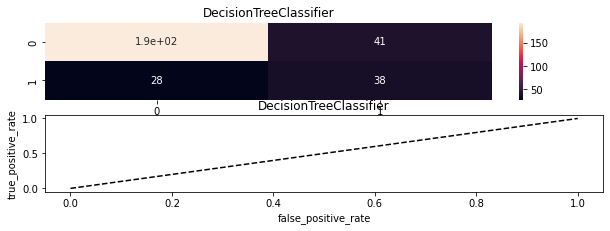

************** RandomForestClassifier ***********


RandomForestClassifier()


accuracy score 0.7666666666666667
Cross-val-score= 0.7842857142857144


roc_auc_score 0.6002331002331002


              precision    recall  f1-score   support

           0       0.82      0.90      0.86       234
           1       0.45      0.30      0.36        66

    accuracy                           0.77       300
   macro avg       0.64      0.60      0.61       300
weighted avg       0.74      0.77      0.75       300



[[210  24]
 [ 46  20]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


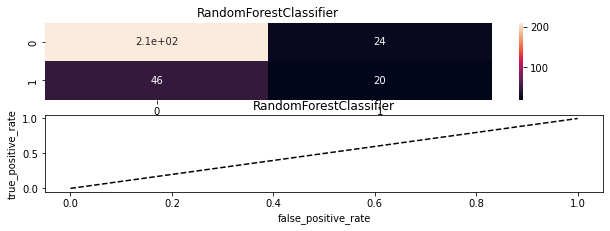

************** KNeighborsClassifier ***********


KNeighborsClassifier()


accuracy score 0.7366666666666667
Cross-val-score= 0.6728571428571429


roc_auc_score 0.5211732711732711


              precision    recall  f1-score   support

           0       0.79      0.91      0.84       234
           1       0.29      0.14      0.19        66

    accuracy                           0.74       300
   macro avg       0.54      0.52      0.51       300
weighted avg       0.68      0.74      0.70       300



[[212  22]
 [ 57   9]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


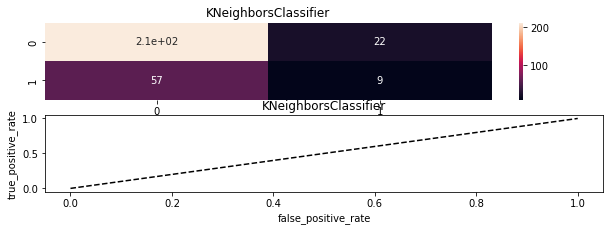

************** SGDClassifier ***********


SGDClassifier()


accuracy score 0.7733333333333333
Cross-val-score= 0.6371428571428572


roc_auc_score 0.49572649572649574


              precision    recall  f1-score   support

           0       0.78      0.99      0.87       234
           1       0.00      0.00      0.00        66

    accuracy                           0.77       300
   macro avg       0.39      0.50      0.44       300
weighted avg       0.61      0.77      0.68       300



[[232   2]
 [ 66   0]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


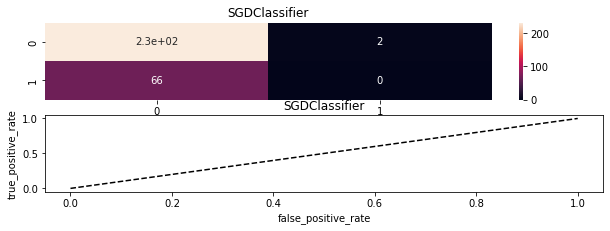

************** LogisticRegression ***********


LogisticRegression()


accuracy score 0.78
Cross-val-score= 0.7414285714285714


roc_auc_score 0.5


              precision    recall  f1-score   support

           0       0.78      1.00      0.88       234
           1       0.00      0.00      0.00        66

    accuracy                           0.78       300
   macro avg       0.39      0.50      0.44       300
weighted avg       0.61      0.78      0.68       300



[[234   0]
 [ 66   0]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


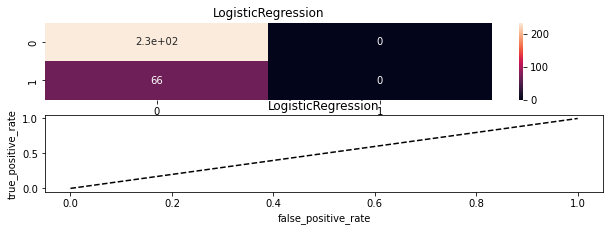

In [80]:
#evaluate each model in turn
Model=[]
cvs=[]
score=[]
rocscore=[]
for name,model in models:
    print('**************',name,'***********')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    acc=accuracy_score(y_test,pred)
    print('accuracy score',acc)
    score.append(acc*100)
    kfold=model_selection.KFold(n_splits=10)
    # ---------------------------------------------------------------------------------------------------------
    
    cv=model_selection.cross_val_score(model,x_train,y_train,cv=10,scoring='accuracy').mean()
    print('Cross-val-score=',cv)
    cvs.append(cv*100)
    print('\n')
    # ---------------------------------------------------------------------------------------------------------
        
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pred, pos_label=2)
    roc_auc=roc_auc_score(y_test,pred)
    print('roc_auc_score',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print(classification_report(y_test,pred))
    print('\n')
    cm=confusion_matrix(y_test,pred)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,15))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    
    plt.plot(false_positive_rate,true_positive_rate,label='AUC'%roc_auc)
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('false_positive_rate')
    plt.ylabel('true_positive_rate')
    plt.show()

## With varying Random State

 ------------------------ Results with Random State 0 ------------------------
                        Model        cvs      score   rocscore
0      DecisionTreeClassifier  78.428571  80.333333  70.616155
1      RandomForestClassifier  75.857143  74.333333  56.802166
2        KNeighborsClassifier  72.142857  71.000000  53.709743
3               SGDClassifier  71.142857  77.333333  70.723895
4          LogisticRegression  76.857143  78.000000  63.094753
5                   LinearSVC  75.571429  78.666667  61.842642
6  GradientBoostingClassifier  82.571429  80.000000  71.242211
7                  GaussianNB  77.285714  75.333333  61.726166
 ------------------------ Results with Random State 1 ------------------------
                        Model        cvs      score   rocscore
0      DecisionTreeClassifier  78.714286  69.000000  60.965909
1      RandomForestClassifier  76.571429  76.333333  63.181818
2        KNeighborsClassifier  70.714286  68.333333  51.363636
3               SGDClas

 ------------------------ Results with Random State 13 ------------------------
                        Model        cvs      score   rocscore
0      DecisionTreeClassifier  75.714286  80.333333  74.254658
1      RandomForestClassifier  75.571429  78.666667  62.732919
2        KNeighborsClassifier  69.857143  74.000000  56.211180
3               SGDClassifier  71.142857  72.666667  64.782609
4          LogisticRegression  76.285714  79.000000  67.422360
5                   LinearSVC  76.142857  79.000000  64.440994
6  GradientBoostingClassifier  81.571429  84.666667  78.074534
7                  GaussianNB  75.142857  79.333333  68.633540
 ------------------------ Results with Random State 14 ------------------------
                        Model        cvs      score   rocscore
0      DecisionTreeClassifier  80.285714  79.666667  73.617962
1      RandomForestClassifier  78.000000  78.333333  62.657741
2        KNeighborsClassifier  71.714286  71.000000  48.898213
3               SGDCl

 ------------------------ Results with Random State 26 ------------------------
                        Model        cvs      score   rocscore
0      DecisionTreeClassifier  78.714286  79.000000  66.743346
1      RandomForestClassifier  75.714286  78.000000  61.819347
2        KNeighborsClassifier  72.285714  74.333333  57.652437
3               SGDClassifier  72.142857  80.000000  70.391940
4          LogisticRegression  75.000000  79.666667  66.341506
5                   LinearSVC  73.428571  79.666667  63.365558
6  GradientBoostingClassifier  80.142857  84.666667  76.506901
7                  GaussianNB  75.285714  77.666667  65.421350
 ------------------------ Results with Random State 27 ------------------------
                        Model        cvs      score   rocscore
0      DecisionTreeClassifier  79.000000  77.333333  67.434211
1      RandomForestClassifier  76.571429  77.666667  64.179981
2        KNeighborsClassifier  72.285714  70.666667  52.102914
3               SGDCl

 ------------------------ Results with Random State 39 ------------------------
                        Model        cvs      score   rocscore
0      DecisionTreeClassifier  78.714286  79.333333  72.403597
1      RandomForestClassifier  77.857143  77.333333  62.253334
2        KNeighborsClassifier  71.571429  74.333333  56.088951
3               SGDClassifier  71.142857  72.666667  63.351638
4          LogisticRegression  77.285714  78.000000  63.158530
5                   LinearSVC  77.000000  77.000000  60.639068
6  GradientBoostingClassifier  80.714286  81.333333  71.866514
7                  GaussianNB  76.142857  78.000000  66.875867
 ------------------------ Results with Random State 40 ------------------------
                        Model        cvs      score   rocscore
0      DecisionTreeClassifier  78.571429  78.666667  71.726190
1      RandomForestClassifier  77.000000  75.666667  60.912698
2        KNeighborsClassifier  74.428571  68.000000  49.768519
3               SGDCl

 ------------------------ Results with Random State 52 ------------------------
                        Model        cvs      score   rocscore
0      DecisionTreeClassifier  77.714286  72.666667  67.253708
1      RandomForestClassifier  74.857143  78.333333  66.869703
2        KNeighborsClassifier  70.857143  73.666667  55.362818
3               SGDClassifier  70.857143  74.666667  63.969809
4          LogisticRegression  76.285714  78.666667  64.234640
5                   LinearSVC  75.000000  78.333333  60.606462
6  GradientBoostingClassifier  83.142857  76.000000  72.219280
7                  GaussianNB  75.857143  77.333333  65.095339
 ------------------------ Results with Random State 53 ------------------------
                        Model        cvs      score   rocscore
0      DecisionTreeClassifier  79.571429  71.333333  65.258584
1      RandomForestClassifier  77.000000  79.666667  67.512522
2        KNeighborsClassifier  72.285714  76.000000  56.725605
3               SGDCl

 ------------------------ Results with Random State 65 ------------------------
                        Model        cvs      score   rocscore
0      DecisionTreeClassifier  76.571429  84.333333  79.280635
1      RandomForestClassifier  73.714286  81.333333  62.462366
2        KNeighborsClassifier  68.857143  75.666667  57.219268
3               SGDClassifier  70.714286  72.666667  64.326436
4          LogisticRegression  74.857143  79.666667  62.452758
5                   LinearSVC  74.285714  78.333333  58.936007
6  GradientBoostingClassifier  80.000000  84.666667  75.773493
7                  GaussianNB  74.428571  81.333333  70.437512
 ------------------------ Results with Random State 66 ------------------------
                        Model        cvs      score   rocscore
0      DecisionTreeClassifier  79.714286  80.000000  71.096563
1      RandomForestClassifier  76.428571  78.666667  63.011457
2        KNeighborsClassifier  70.857143  75.666667  57.201309
3               SGDCl

 ------------------------ Results with Random State 78 ------------------------
                        Model        cvs      score   rocscore
0      DecisionTreeClassifier  78.714286  71.000000  64.222222
1      RandomForestClassifier  80.714286  74.333333  60.666667
2        KNeighborsClassifier  75.000000  71.666667  52.222222
3               SGDClassifier  72.285714  72.000000  61.777778
4          LogisticRegression  78.714286  76.333333  64.666667
5                   LinearSVC  78.285714  75.333333  61.333333
6  GradientBoostingClassifier  84.000000  71.666667  64.222222
7                  GaussianNB  78.571429  73.333333  62.666667
 ------------------------ Results with Random State 79 ------------------------
                        Model        cvs      score   rocscore
0      DecisionTreeClassifier  78.142857  80.000000  73.357444
1      RandomForestClassifier  79.000000  79.000000  62.236287
2        KNeighborsClassifier  70.714286  73.333333  53.988346
3               SGDCl

 ------------------------ Results with Random State 91 ------------------------
                        Model        cvs      score   rocscore
0      DecisionTreeClassifier  78.142857  79.333333  70.826275
1      RandomForestClassifier  77.571429  77.333333  62.921137
2        KNeighborsClassifier  71.285714  73.333333  54.733672
3               SGDClassifier  70.428571  70.333333  61.932995
4          LogisticRegression  78.142857  79.333333  64.728026
5                   LinearSVC  77.571429  78.333333  62.045925
6  GradientBoostingClassifier  84.000000  79.333333  72.350838
7                  GaussianNB  76.571429  78.000000  65.386787
 ------------------------ Results with Random State 92 ------------------------
                        Model        cvs      score   rocscore
0      DecisionTreeClassifier  78.428571  78.000000  69.492944
1      RandomForestClassifier  77.000000  76.666667  64.063621
2        KNeighborsClassifier  71.857143  70.333333  52.589094
3               SGDCl

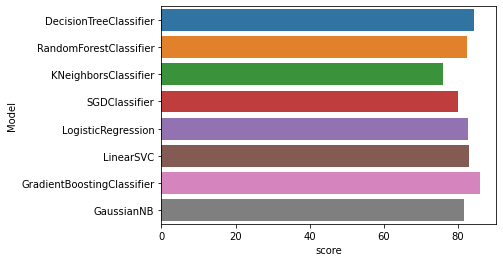

In [82]:
for i in [i for i in range(0, 101)]:
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    
    
    # To Prevent Data Leakages, We are scaling data for each train and test. To keep, 
    sc=StandardScaler()
    x_train=sc.fit_transform(x_train)
    x_test=sc.fit_transform(x_test)
    
    
    dtc=DecisionTreeClassifier()
    rfc=RandomForestClassifier()
    lg=LogisticRegression()
    knc=KNeighborsClassifier()
    sgc=SGDClassifier()
    svc = LinearSVC()
    gbc = GradientBoostingClassifier()
    gnb = GaussianNB()
    
    
    seed=7
    #prepare models
    models=[]
    models.append(('DecisionTreeClassifier',dtc))
    models.append(('RandomForestClassifier',rfc))
    models.append(('KNeighborsClassifier',knc))
    models.append(('SGDClassifier',sgc))
    models.append(('LogisticRegression',lg))
    models.append(('LinearSVC', svc))
    models.append(('GradientBoostingClassifier', gbc))
    models.append(('GaussianNB', gnb))
    
    
    
    #evaluate each model in turn ----------------------------------------------------------------------------------------
    Model=[]
    cvs=[]
    score=[]
    rocscore=[]
    for name,model in models:
        # print('**************',name,'***********')
        # print('\n')
        Model.append(name)
        model.fit(x_train,y_train)
        # print(model)
        pred=model.predict(x_test)
        # print('\n')
        acc=accuracy_score(y_test,pred)
        # print('accuracy score',acc)
        score.append(acc*100)
        kfold=model_selection.KFold(n_splits=10)
        # ---------------------------------------------------------------------------------------------------------

        cv=model_selection.cross_val_score(model,x_train,y_train,cv=10,scoring='accuracy').mean()
        # print('Cross-val-score=',cv)
        cvs.append(cv*100)
        # print('\n')
        # ---------------------------------------------------------------------------------------------------------

        false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pred, pos_label=2)
        roc_auc=roc_auc_score(y_test,pred)
        # print('roc_auc_score',roc_auc)
        rocscore.append(roc_auc*100)
        # print('\n')
        # print(classification_report(y_test,pred))
        # print('\n')
        cm=confusion_matrix(y_test,pred)
        # print(cm)
        # print('\n')
        # plt.figure(figsize=(10,15))
        # plt.subplot(911)
        # plt.title(name)
        # print(sns.heatmap(cm,annot=True))
        # plt.subplot(912)
        # plt.title(name)

        # plt.plot(false_positive_rate,true_positive_rate,label='AUC'%roc_auc)
        # plt.plot([0,1],[0,1],'k--')
        # plt.xlabel('false_positive_rate')
        # plt.ylabel('true_positive_rate')
        # plt.show()

        
    result=pd.DataFrame({'Model':Model, 'cvs' :cvs, 'score' :score, 'rocscore' :rocscore}, columns=['Model', 'cvs','score','rocscore'])
    print(f'\033[1m ------------------------ Results with Random State {i} ------------------------')
    print(result)
    sns.barplot(y='Model',x='score',data=result)
    result['score']

### GradientBoostingClassifier Getting Accuracy of 85.57 at random_state = 23

In [83]:
from sympy.polys.domains import ZZ

In [84]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=22)

In [85]:
clf_gb=GridSearchCV(estimator=GradientBoostingClassifier(),cv=10,param_grid=dict({'n_estimators':[500]}))
clf_gb.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid={'n_estimators': [500]})

In [86]:
clf_gb.best_score_

0.7985714285714286

In [87]:
clf_gb.best_params_

{'n_estimators': 500}

In [88]:
clf_gb_df = pd.DataFrame(clf_gb.cv_results_)
clf_gb_df

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.581079      0.021867         0.001761        0.001521   

  param_n_estimators                 params  split0_test_score  \
0                500  {'n_estimators': 500}           0.814286   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.814286                0.8                0.8           0.757143   

   split5_test_score  split6_test_score  split7_test_score  split8_test_score  \
0           0.857143           0.857143           0.728571           0.828571   

   split9_test_score  mean_test_score  std_test_score  rank_test_score  
0           0.728571         0.798571         0.04447                1

In [92]:
pred=clf_gb.predict(x_test)
print(f'Accuracy of GradientBoostingClassifier is {round(accuracy_score(pred,y_test)*100,4)}')

Accuracy of GradientBoostingClassifier is 82.0


In [90]:
cv=model_selection.cross_val_score(clf_gb,x_train,y_train,cv=10,scoring='accuracy').mean()
cv

0.8

In [91]:
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pred, pos_label=2)
roc_auc=roc_auc_score(y_test,pred)
print(roc_auc*100)

75.34069548872179


## Creating Model For Production, Gradient Boosting = 82 %

In [94]:
# Save File
import pickle
file = 'fraud_detection'
#save file
save = pickle.dump(pred,open(file,'wb'))